## Flight Fare Prediction

<table>
    <tr>
        <th>Project Title</th>
        <td>Flight Fare Prediction</td>
    </tr>
    <tr>
        <th>Technologies</th>
        <td>Machine Learning Technology</td>
    </tr>
    <tr>
        <th>Domain</th>
        <td>Aviation</td>
    </tr>
</table>

### Problem Statement
Travelling through flights has become an integral part of today’s lifestyle as more and more people are opting for faster travelling options. The flight ticket prices increase or decrease every now and then depending on various factors like timing of the flights,
destination, and duration of flights various occasions such as vacations or festive
season. Therefore, having some basic idea of the flight fares before planning the trip will surely help many people save money and time.
The main goal is to predict the fares of the flights based on different factors available in the provided dataset.

### Approach
The classical machine learning tasks like Data Exploration, Data Cleaning, Feature Engineering, Model Building and Model Testing.

### Features
1. Airline
    * The airline providing the flight service.
2. Date_of_Journey
    * The date when the flight departs.
3. Source
    * The departure city or airport.
4. Destination
    * The arrival city or airport.
5. Route
    * Route taken by flight.
6. Dep_Time
    * The time when the flight departs.
7. Arrival_Time
    * The time of day when the flight arrives.
8. Duration
    * Total duration of the flight in minutes.
9. Total_Stops
     * Number of stops in flight.
10. Additional_Info
    * Other features that may impact flight fare, including the provision of in-flight meals.
11. Price
    * The cost of the flight ticket.

In [1]:
# importing libraries
import numpy as np
import pandas as pd
import warnings
import IPython.display

# Any warning created by pandas, python, other library will be ignored
warnings.filterwarnings("ignore")
# Setting Maximum number of displaying columns to None to see all columns
pd.set_option('display.max_columns', None)

In [8]:
# For this notebook I have stored a copy of data inside notebooks directory
train_dataset_path = '../data/raw/Data_Train.xlsx'
test_dataset_path = '../data/raw/Test_set.xlsx'
sub_dataset_path = '../data/raw/Sample_submission.xlsx'

# reading dataset
train = pd.read_excel(train_dataset_path)
test = pd.read_excel(test_dataset_path)
sub = pd.read_excel(sub_dataset_path)

In [9]:
def get_details(data: pd.DataFrame) -> None:
    '''
    Displays the details, information and statistics about data.
    * Details = Number of Rows, Columns.
    * Details = Datatypes information, Top 5 and Last 5 rows of data.
    * Statistics = NaN Values, Descriptive Statistics.
    ## Parameters
    `data`: Pandas DataFrame Object
    '''

    def title(string: str, width=50) -> None:
        '''
        Prints a centered string of length width(default=50).
        ### Example
        >>> title('abc')
        '----------------------abc-----------------------'
        >>>
        '''
        print(string.center(width, '_'))
    
    title('Shape')
    Rows = data.shape[0]
    Columns = data.shape[1]
    print(f'{Rows=}\n{Columns=}')

    title('Types')
    # Displays the dtypes object to cell output
    IPython.display.display(data.dtypes)

    title('Head')
    # displays the data.head to cell output
    IPython.display.display(data.head())

    title('Tail')
    IPython.display.display(data.tail())

    title('Nan Values')
    IPython.display.display(data.isna().sum())
    
    title('Statistics')
    # displays the descriptive statistics to cell output
    IPython.display.display(data.describe(include='all').T)

### Dataset Information

In [5]:
# details of train dataset
get_details(train)

______________________Shape_______________________
Rows=10683
Columns=11
______________________Types_______________________


Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

_______________________Head_______________________


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


_______________________Tail_______________________


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648
10682,Air India,9/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,10:55,19:15,8h 20m,2 stops,No info,11753


____________________Nan Values____________________


Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

____________________Statistics____________________


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Airline,10683,12,Jet Airways,3849,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Date_of_Journey,10683,44,18/05/2019,504,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Source,10683,5,Delhi,4537,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Destination,10683,6,Cochin,4537,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Route,10682,128,DEL → BOM → COK,2376,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dep_Time,10683,222,18:55,233,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Arrival_Time,10683,1343,19:00,423,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Duration,10683,368,2h 50m,550,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Total_Stops,10682,5,1 stop,5625,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Additional_Info,10683,10,No info,8345,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Conclusion: Here we can see that column Route and Total_Stops have missing values, 75% of flight's Price is less than ₹ 13000. Most of the flight are from Jet Airways Airline.

In [6]:
# details of test dataset
get_details(test)

______________________Shape_______________________
Rows=2671
Columns=10
______________________Types_______________________


Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
dtype: object

_______________________Head_______________________


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


_______________________Tail_______________________


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info
2670,Multiple carriers,15/06/2019,Delhi,Cochin,DEL → BOM → COK,04:55,19:15,14h 20m,1 stop,No info


____________________Nan Values____________________


Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

____________________Statistics____________________


,count,unique,top,freq
Airline,2671,11,Jet Airways,897
Date_of_Journey,2671,44,9/05/2019,144
Source,2671,5,Delhi,1145
Destination,2671,6,Cochin,1145
Route,2671,100,DEL → BOM → COK,624
Dep_Time,2671,199,10:00,62
Arrival_Time,2671,704,19:00,113
Duration,2671,320,2h 50m,122
Total_Stops,2671,5,1 stop,1431
Additional_Info,2671,6,No info,2148


Here we can see that the test dataset is missing a **Price** column. Similarly in Test data most of the flights are from Jet Airways. there are no NaN values in Test.

In [7]:
# details of sub dataset
get_details(sub)

______________________Shape_______________________
Rows=2671
Columns=1
______________________Types_______________________


Price    int64
dtype: object

_______________________Head_______________________


,Price
0,15998
1,16612
2,25572
3,25778
4,16934


_______________________Tail_______________________


,Price
2666,14046
2667,14086
2668,22720
2669,23544
2670,27489


____________________Nan Values____________________


Price    0
dtype: int64

____________________Statistics____________________


,count,mean,std,min,25%,50%,75%,max
Price,2671.0,20159.514414,5005.399225,10138.0,16469.5,19582.0,23476.5,64881.0


**Handling Missing** Value in the train data, as we see previously the Route and Total_Stops columns each has 1 missing value.

First checking Route column

In [8]:
# Filtering rows based on missing value in Route column
train[train['Route'].isna()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


Both the NaN values of Route and Total_Stops are present in this row, Now filter rows whose Source is 'Delhi' and Destination is 'Cochin'

In [9]:
row_filter = (train['Source'] == 'Delhi') & (train['Destination'] == 'Cochin')
temp = train.loc[row_filter]
temp

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
9,Multiple carriers,27/05/2019,Delhi,Cochin,DEL → BOM → COK,11:25,19:15,7h 50m,1 stop,No info,8625
10,Air India,1/06/2019,Delhi,Cochin,DEL → BLR → COK,09:45,23:00,13h 15m,1 stop,No info,8907
15,Air India,3/03/2019,Delhi,Cochin,DEL → AMD → BOM → COK,16:40,19:15 04 Mar,26h 35m,2 stops,No info,14011
16,SpiceJet,15/04/2019,Delhi,Cochin,DEL → PNQ → COK,08:45,13:15,4h 30m,1 stop,No info,5830
...,...,...,...,...,...,...,...,...,...,...,...
10669,Air India,15/06/2019,Delhi,Cochin,DEL → BOM → COK,08:00,19:15,11h 15m,1 stop,No info,9929
10672,Jet Airways,27/06/2019,Delhi,Cochin,DEL → AMD → BOM → COK,23:05,19:00 28 Jun,19h 55m,2 stops,In-flight meal not included,11150
10673,Jet Airways,27/05/2019,Delhi,Cochin,DEL → AMD → BOM → COK,13:25,04:25 28 May,15h,2 stops,No info,16704
10676,Multiple carriers,1/05/2019,Delhi,Cochin,DEL → BOM → COK,10:20,19:00,8h 40m,1 stop,No info,9794


Based on the filter we have 4537 rows.
In the missing row the Airline is 'Air India' and the Duration of Flight is 23h 40m.
Now adding Airline and Duration filter

In [10]:
row_filter = (train['Airline'] == 'Air India') & (train['Source'] == 'Delhi') & (train['Destination'] == 'Cochin') & (train['Duration'] == '23h 40m')
temp = train.loc[row_filter]
temp.shape

(27, 11)

Now we have 27 rows including missing value

In [11]:
temp

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
1336,Air India,9/03/2019,Delhi,Cochin,DEL → HYD → MAA → COK,09:45,09:25 10 Mar,23h 40m,2 stops,No info,10660
1616,Air India,24/05/2019,Delhi,Cochin,DEL → MAA → COK,09:45,09:25 25 May,23h 40m,1 stop,No info,7480
1679,Air India,3/06/2019,Delhi,Cochin,DEL → HYD → MAA → COK,09:45,09:25 04 Jun,23h 40m,2 stops,No info,10975
1862,Air India,27/06/2019,Delhi,Cochin,DEL → HYD → MAA → COK,09:45,09:25 28 Jun,23h 40m,2 stops,No info,10975
2343,Air India,15/05/2019,Delhi,Cochin,DEL → HYD → MAA → COK,09:45,09:25 16 May,23h 40m,2 stops,No info,10975
2554,Air India,15/05/2019,Delhi,Cochin,DEL → MAA → COK,09:45,09:25 16 May,23h 40m,1 stop,No info,7480
3272,Air India,27/03/2019,Delhi,Cochin,DEL → HYD → MAA → COK,09:45,09:25 28 Mar,23h 40m,2 stops,No info,7090
3595,Air India,18/05/2019,Delhi,Cochin,DEL → MAA → COK,09:45,09:25 19 May,23h 40m,1 stop,No info,8372
4280,Air India,1/04/2019,Delhi,Cochin,DEL → MAA → COK,09:45,09:25 02 Apr,23h 40m,1 stop,No info,5117
4351,Air India,27/06/2019,Delhi,Cochin,DEL → MAA → COK,09:45,09:25 28 Jun,23h 40m,1 stop,No info,7480


The missing value in Route column is either "DEL → HYD → MAA → COK" or "DEL → MAA → COK" and Total_Stops is either "1 stop" if Route is "DEL → MAA → COK" and "2 stops" if Route is "DEL → HYD → MAA → COK".
Here I am grouping above 27 rows based on Route and then take the median of Price, If the price of a route is near to the missing value price then that route used as replacement for missing value.

In [12]:
# Price of Flight in the missing row
temp[temp['Route'].isna()]['Price'].values

array([7480])

In [13]:
# Median price of flight on each Route
temp.groupby('Route').Price.median()

Route
DEL → HYD → MAA → COK    10975.0
DEL → MAA → COK           7506.0
Name: Price, dtype: float64

The price of Route "DEL → MAA → COK" is nearly equal to the price of missing row, So replacing "DEL → MAA → COK" with NaN value in Route and this route has only 1 stop, also replacing "1 stop" with NaN value in Total_Stops.

In [10]:
train['Route'].fillna(value='DEL → MAA → COK ', inplace=True)
train['Total_Stops'].fillna(value='1 stop', inplace=True)

Dropping duplicated rows in train and test data.

In [11]:
# Droping Duplicates
train.drop_duplicates(inplace=True)
test.drop_duplicates(inplace=True)

In [12]:
# Adding both train and test dataset into one dataframe 
df = pd.concat(objs = [train, test], axis=0, ignore_index=True)

In [13]:
# details of the both train and test dataset
get_details(df)

______________________Shape_______________________
Rows=13108
Columns=11
______________________Types_______________________


Airline             object
Date_of_Journey     object
Source              object
Destination         object
Route               object
Dep_Time            object
Arrival_Time        object
Duration            object
Total_Stops         object
Additional_Info     object
Price              float64
dtype: object

_______________________Head_______________________


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0


_______________________Tail_______________________


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
13103,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info,NaN
13104,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info,NaN
13105,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info,NaN
13106,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info,NaN
13107,Multiple carriers,15/06/2019,Delhi,Cochin,DEL → BOM → COK,04:55,19:15,14h 20m,1 stop,No info,NaN


____________________Nan Values____________________


Airline               0
Date_of_Journey       0
Source                0
Destination           0
Route                 0
Dep_Time              0
Arrival_Time          0
Duration              0
Total_Stops           0
Additional_Info       0
Price              2645
dtype: int64

____________________Statistics____________________


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Airline,13108,12,Jet Airways,4586,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Date_of_Journey,13108,44,12/06/2019,615,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Source,13108,5,Delhi,5473,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Destination,13108,6,Cochin,5473,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Route,13108,133,DEL → BOM → COK,2996,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dep_Time,13108,223,18:55,287,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Arrival_Time,13108,1451,19:00,524,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Duration,13108,374,2h 50m,665,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Total_Stops,13108,5,1 stop,7053,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Additional_Info,13108,10,No info,10309,NaN,NaN,NaN,NaN,NaN,NaN,NaN


These 2645 Nan values are from the missing Price column in test dataset.

Separating the Duration column in data into two column "Duration_Hour", "Duration_Mins".

In [14]:
# Cleaning Data

# Duration is time taken by Flight to reach destination
# It is difference of Arrival Time and Departure Time
# The duration in dataset is written as '10h 50m' splitting it in two columns

# the regex pattern '(\d+)h would match any string that ends with 'h'
hours = df['Duration'].str.extract(pat=r'(\d+)h')
# filling the NaN values with 0 because flight is less than 1 hour
hours.fillna(value=0, inplace=True)

# the regex pattern here '(\d+)m' would match any string that ends with 'm'
minutes = df['Duration'].str.extract(pat=r'(\d+)m')
# filling the NaN values with 0 because flight take proper time in hours
minutes.fillna(value=0, inplace=True)

In [15]:
# converting the hours and minutes into integers as these as extracted from string
df['Duration_Hours'] = hours.astype(int)
df['Duration_Mins'] = minutes.astype(int)
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Duration_Hours,Duration_Mins
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,2,50
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,7,25
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,19,0
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,5,25
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,4,45


In [16]:
# Extracting day of journey from Date
df['Date_of_Journey'] = pd.to_datetime(df['Date_of_Journey'], format='%d/%m/%Y')
df['Journey_Day'] = df['Date_of_Journey'].dt.day
# Extracting Month of Journey from Date
df['Journey_Month'] = df['Date_of_Journey'].dt.month
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Duration_Hours,Duration_Mins,Journey_Day,Journey_Month
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,2,50,24,3
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,7,25,1,5
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,19,0,9,6
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,5,25,12,5
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,4,45,1,3


Seperating Departure Hour and Departure Minute from Departure Time ("Dep_Time") column.

In [17]:
# Splitting the departure time into two columns using ":" as seperater
# For Departure Hour and Departure Minutes
departure_time = df['Dep_Time'].str.split(pat=':', expand=True)
# converting both columns into integers
df['Dep_Hour'] = departure_time[0].astype(int)
df['Dep_Min'] = departure_time[1].astype(int)

Same for Arrival Time seperating into two column.

In [18]:
# Extracting Arrival Hour and Arrival Minutes from Arrival Time
df['Arrival_Hour'] = pd.to_datetime(df['Arrival_Time']).dt.hour
df['Arrival_Minute'] = pd.to_datetime(df['Arrival_Time']).dt.minute

In [19]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Duration_Hours,Duration_Mins,Journey_Day,Journey_Month,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,2,50,24,3,22,20,1,10
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,7,25,1,5,5,50,13,15
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,19,0,9,6,9,25,4,25
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,5,25,12,5,18,5,23,30
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,4,45,1,3,16,50,21,35


## Plotting

In [24]:
# importing library for graph plotting
import matplotlib.pyplot as plt
import seaborn as sns

### Distribution of Arrival Hour

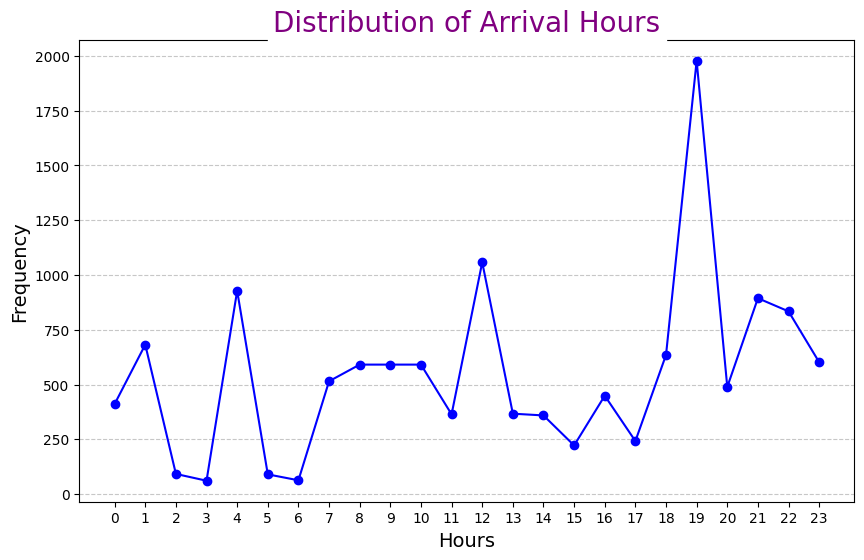

In [25]:
# setting the figure size 10x6
plt.figure(figsize=(10, 6))

# counting the frequency of each Arrival hour
arrival_hour = df['Arrival_Hour'].value_counts().sort_index()

# plotting a line graph of each Arrival Hour
arrival_hour.plot(kind='line', marker='o', color='blue', linestyle='-')

# setting the title of graph
plt.title("Distribution of Arrival Hours", fontsize=20, backgroundcolor='white', color='purple')

# setting the x-axis label of graph
plt.xlabel('Hours', fontsize=14)

# setting the y-axis label of graph
plt.ylabel('Frequency', fontsize=14)

# adding each hour x-axis
plt.xticks(ticks=range(24))

# adding grid lines to graph
plt.grid(axis='y', linestyle='--', alpha=0.7)


plt.show()

**Conclusion:** 
1. Most of the flight arrives at 7 PM followed by at 12 PM and 4 AM.
2. Very less number of flight arrives in between 2AM to 3AM and 5AM to 6AM.

### Distribution of Departure Hour

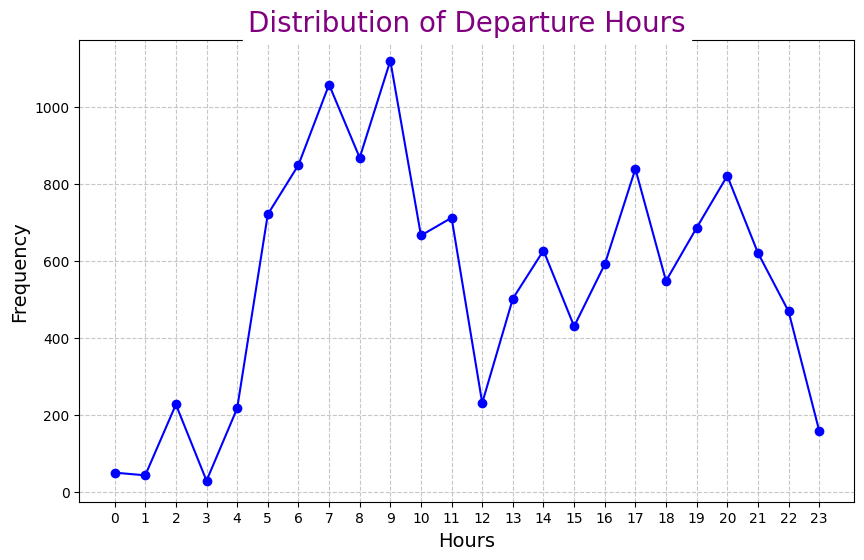

In [26]:
# setting the figure size 10x6
plt.figure(figsize=(10, 6))

# Counting the frequency of each Depature Hour
dep_time = df['Dep_Hour'].value_counts().sort_index()

# plotting a line graph
dep_time.plot(kind='line', marker='o', style='-', color='blue')

# settting the Title of graph
plt.title("Distribution of Departure Hours", fontsize=20, backgroundcolor='white', color='purple')


# setting the x-axis label of graph
plt.xlabel('Hours', fontsize=14)

# setting the y-axis label of graph
plt.ylabel('Frequency', fontsize=14)

# adding each hour on x-axis
plt.xticks(ticks=range(24))

# adding grid lines to graph
plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.show()

**Conclusion:**
1. Most flight deperature at 7AM and 9 AM followed by 5PM and 8PM.
2. Very less number of flight departure at in between 12AM and 1 AM.

### Price Distribution Across Month

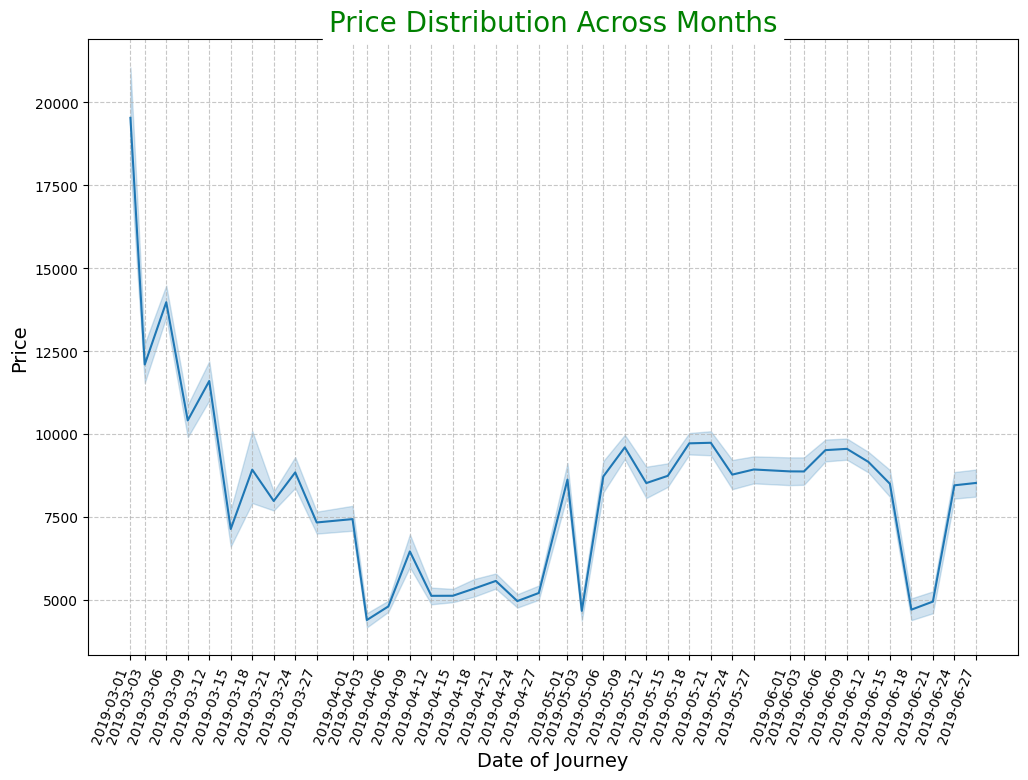

In [27]:
# filtering out null values from Price column
df_no_null = df[df['Price'].notna()]


plt.figure(figsize=(12, 8))

sns.lineplot(data=df_no_null.sort_values(by='Date_of_Journey'), x='Date_of_Journey', y='Price')

# Title of Graph
plt.title("Price Distribution Across Months", fontsize=20, backgroundcolor='white', color='green')
plt.xlabel('Date of Journey', fontsize=14)
plt.ylabel('Price', fontsize=14)

# adding grid to graph
plt.grid(axis='both', linestyle='--', alpha=0.7)

x_axis_ticks = df_no_null['Date_of_Journey'].sort_values().value_counts(sort=False).index
plt.xticks(ticks=x_axis_ticks, rotation=70, ha='right')

plt.show()

Conclusion: Price of flight drops 62.5% from 20000 to 12500 in between 1-3 March, from 5 May to 15 June flight price were roughly same. In between 3 April to 27 April and 18 June to 21 June Price were lower.

In [28]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Duration_Hours,Duration_Mins,Journey_Day,Journey_Month,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,2,50,24,3,22,20,1,10
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,7,25,1,5,5,50,13,15
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,19,0,9,6,9,25,4,25
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,5,25,12,5,18,5,23,30
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,4,45,1,3,16,50,21,35


### Highest Journey Month

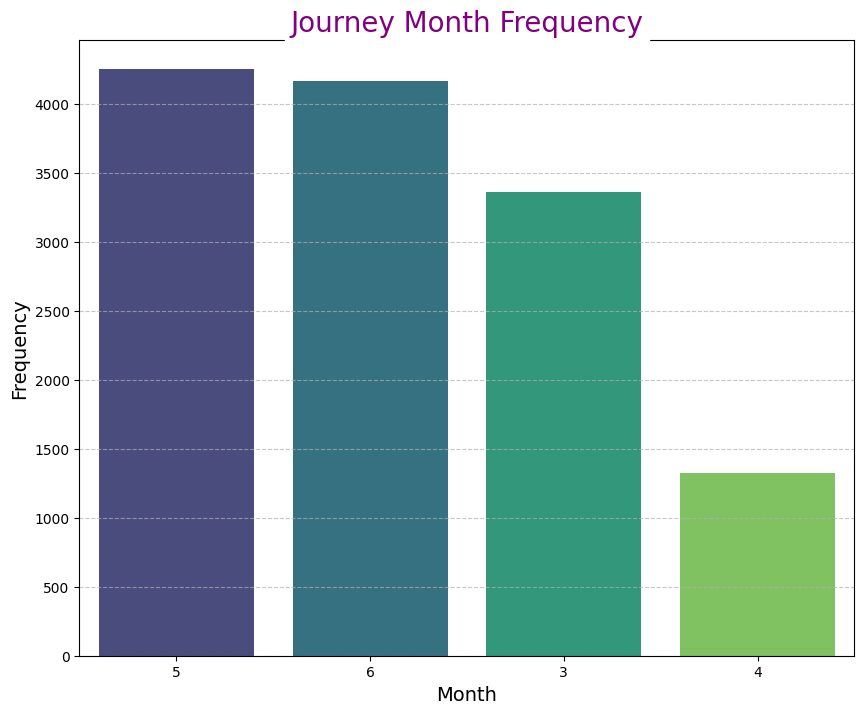

In [29]:
plt.figure(figsize=(10, 8))
sns.countplot(data=df, x='Journey_Month', order=df['Journey_Month'].value_counts().index, palette='viridis')

# Title of Graph
plt.title('Journey Month Frequency', fontsize=20, backgroundcolor='white', color='purple')
plt.ylabel('Frequency', fontsize=14)
plt.xlabel('Month', fontsize=14)

# adding grid lines
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Most number of flight are in May, June. In this period most of education institution have vacation peroid, Usually families to vacation in this peroid, Also from previous graph in this period the price of flight remains nearly equal.

### Distribution of Hours

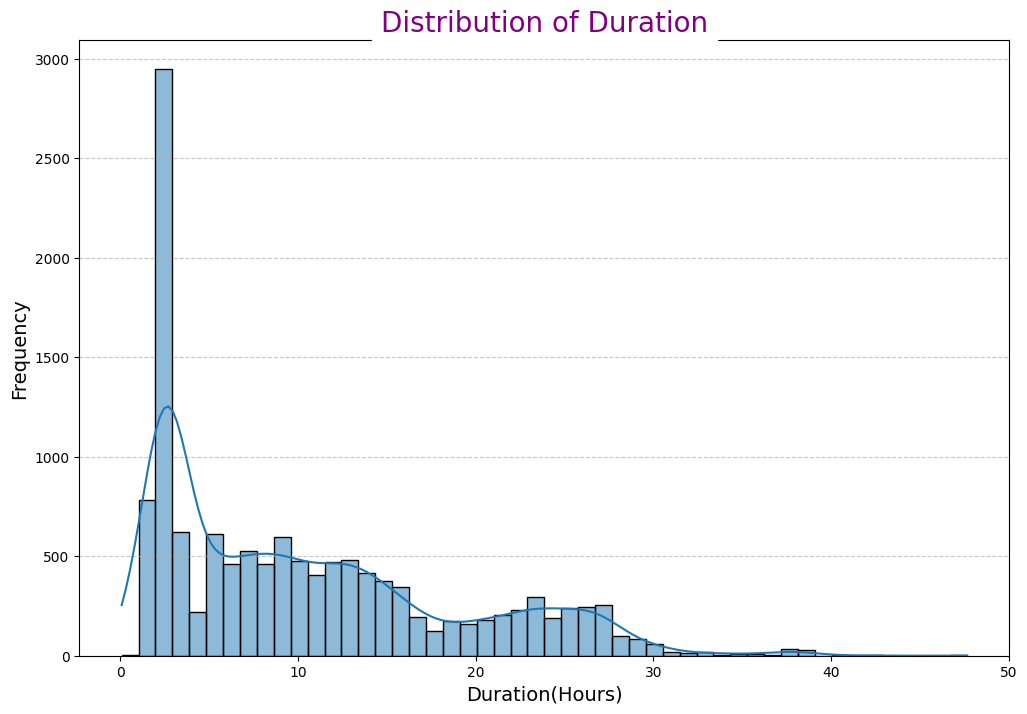

In [30]:
duration = df['Duration_Hours'] + (df['Duration_Mins']/60)
plt.figure(figsize=(12, 8))
sns.histplot(data=duration, palette='viridis', bins=50, kde=True)

# Title of Distribution
plt.title('Distribution of Duration', backgroundcolor='white', color='purple', fontsize=20)
plt.xlabel('Duration(Hours)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
# adding grid
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

Conclusion: Most of the flights duration is in-between 1 to 3 hours.

Droping columns

In [36]:
# droping columns Arrival_Time, Date_of_Journey, Duration, Dep_Time
df.drop(columns=[
    "Arrival_Time", 
    "Date_of_Journey", 
    "Duration", 
    "Dep_Time"
    ], 
    inplace = True
)

In [32]:
df.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Duration_Hours,Duration_Mins,Journey_Day,Journey_Month,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897.0,2,50,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662.0,7,25,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882.0,19,0,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218.0,5,25,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302.0,4,45,1,3,16,50,21,35


In [33]:
df.Price.quantile([0, .25, .5, .75, .99, 1])

0.00     1759.0
0.25     5224.0
0.50     8266.0
0.75    12343.5
0.99    22270.0
1.00    79512.0
Name: Price, dtype: float64

In [34]:
# Creaing Price bins values into discreate interval
Price_Range = pd.cut(
    x=train['Price'], 
    bins=[0, 5000, 10000, 15000, 20000, np.inf], 
    labels=['0-5k', '0-10k', '10-15k', '15-20k', '20k+']
    )
Price_Range

0          0-5k
1         0-10k
2        10-15k
3         0-10k
4        10-15k
          ...  
10678      0-5k
10679      0-5k
10680     0-10k
10681    10-15k
10682    10-15k
Name: Price, Length: 10463, dtype: category
Categories (5, object): ['0-5k' < '0-10k' < '10-15k' < '15-20k' < '20k+']

### Price Distribution Graph

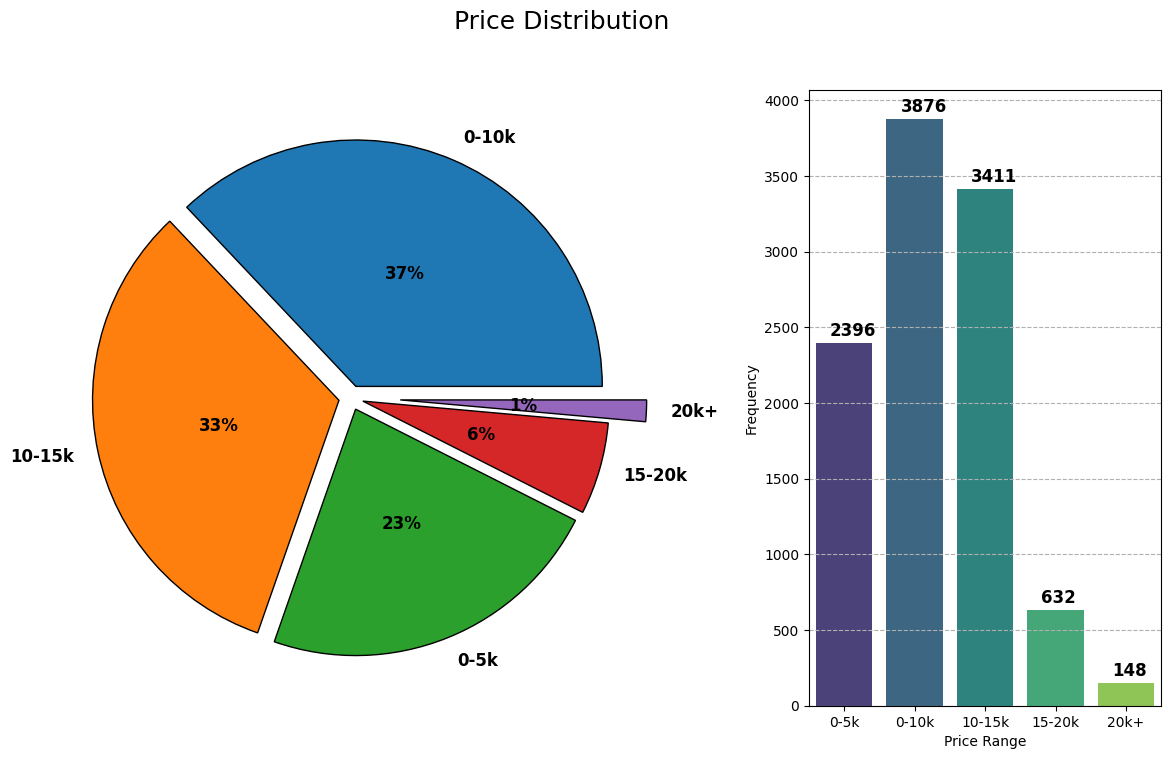

In [35]:
Range_count = Price_Range.value_counts()

# creating figure and axes for 2 plots
fig, ax = plt.subplots(1, 2, figsize=(15, 8), width_ratios=[2, 1])
# adding title of graph as Price Distribution
fig.suptitle(t='Price Distribution', fontsize=18)

# text property used to labels and texts on graphs
text_property = {
    'fontsize': 12, 
    'weight': 'bold',
    "color": "black"
    }
# creating pie plot
ax[0].pie(
    x=Range_count.values,
    labels=Range_count.index,
    autopct='%1.f%%',
    explode=([0.05]*(Range_count.index.size - 1)) + [0.2],
    pctdistance=0.5,
    wedgeprops={'linewidth':1, 'edgecolor':'black'},
    textprops=text_property
    )
# Creating bar plot
sns.countplot(ax=ax[1], x=Price_Range, palette='viridis')

# Writing height of bar above the bar in second graph
for i, count in enumerate(Range_count.sort_index()):
    ax[1].text(x=(i-0.2), y=count+50, s=str(count), fontdict=text_property)

# X axis label of second graph
ax[1].set_xlabel('Price Range')
# Y axis label of second graph
ax[1].set_ylabel('Frequency')
# Adding grid lines to second graph
ax[1].grid(axis='y', linestyle='--')

plt.show()

Conclusion: 93% of the Flights Price are less than ₹15000, only 1% of the flights price are higher than ₹20000. 

### Price Distribution by Airlines

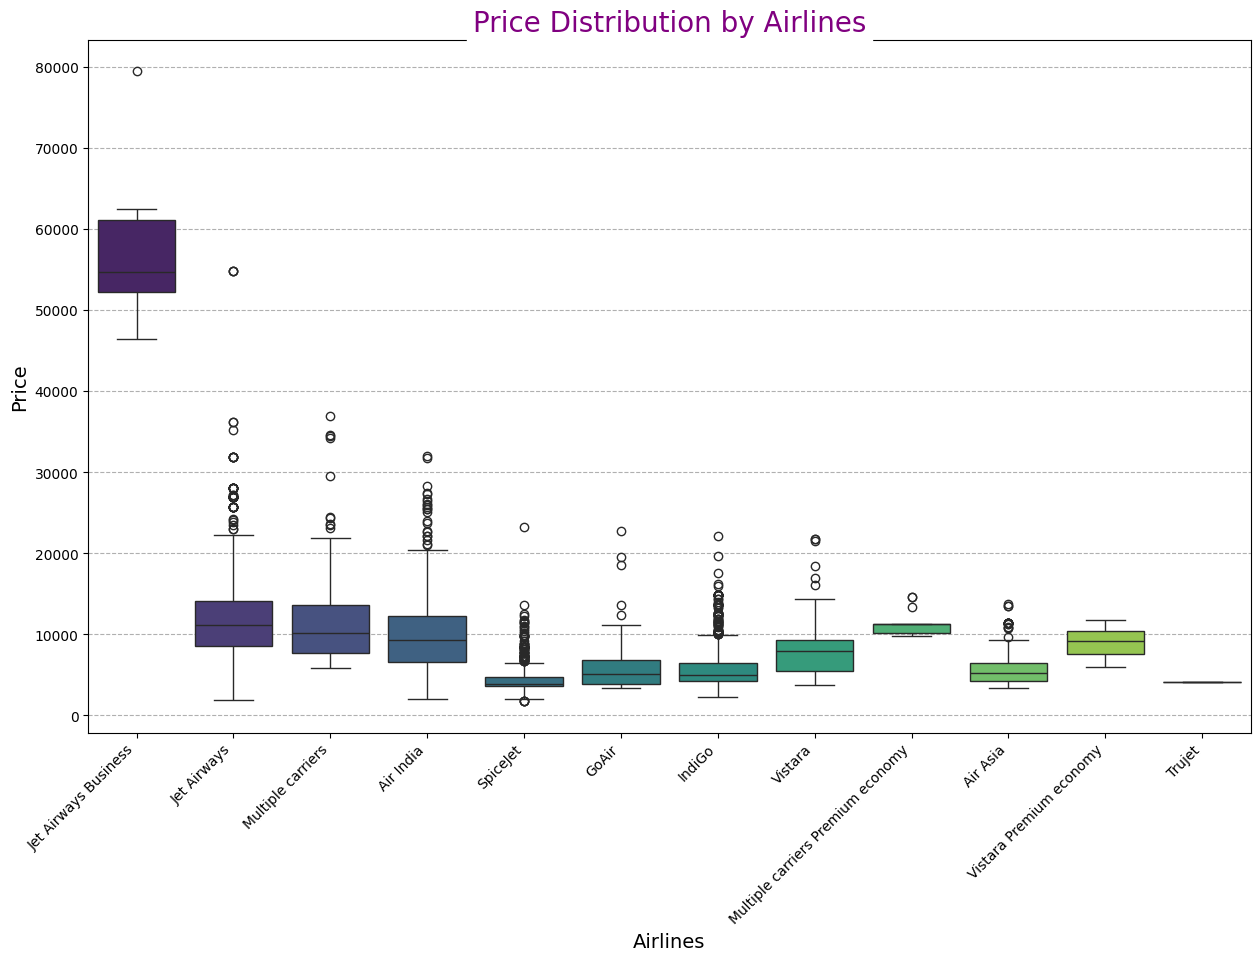

In [36]:
# setting figure size
plt.figure(figsize=(15, 9))
# boxplot
sns.boxplot(data=df.sort_values(by='Price', ascending=False), x='Airline', y='Price', palette='viridis')
# setting title of graph
plt.title('Price Distribution by Airlines', fontsize=20, color='purple', backgroundcolor='white')
# X axis label for graph
plt.xlabel('Airlines', fontsize=14)
# Y axis label for graph
plt.ylabel('Price', fontsize=14)
# Rotating the x-axis label at 45 degree and aligning label to right
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--')
plt.show()

Conclusion:
* Jet Airways Business Ticket Price are very high from the rest of Airlines.
* SpiceJet, Indigo, Air Asia are more on afforable side.

Selecting categorical and numerical columns

In [37]:
def get_cat_num_cols(data: pd.DataFrame) -> tuple[pd.Index, pd.Index]:
    # Numerical columns and categorical columns
    numerical = data.select_dtypes(exclude='O')
    categorical = data.select_dtypes(include='O')

    categorical_columns = categorical.columns
    # selecting numerical columns which has less than 10 unique values
    numerical_but_categorical = [col for col in numerical.columns if numerical[col].nunique() < 10]
    # selecting categorical columns which hass more than 20 unique values
    categorical_but_cardinal = [col for col in categorical.columns if categorical[col].nunique() > 20]

    categorical_columns = categorical_columns.union(numerical_but_categorical, sort=False).difference(categorical_but_cardinal, sort=False)
    numerical_columns = numerical.columns.difference(numerical_but_categorical)

    return categorical_columns, numerical_columns

In [38]:
categorical_columns, numerical_columns = get_cat_num_cols(df)

In [39]:
categorical_columns

Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Additional_Info',
       'Journey_Month'],
      dtype='object')

'______________________________Airline Value Count_______________________________'

,Frequency,Airline Ratio
Airline,,
Jet Airways,4586,34.99
IndiGo,2552,19.47
Air India,2127,16.23
Multiple carriers,1539,11.74
SpiceJet,1023,7.80
Vistara,607,4.63
Air Asia,405,3.09
GoAir,239,1.82
Multiple carriers Premium economy,16,0.12


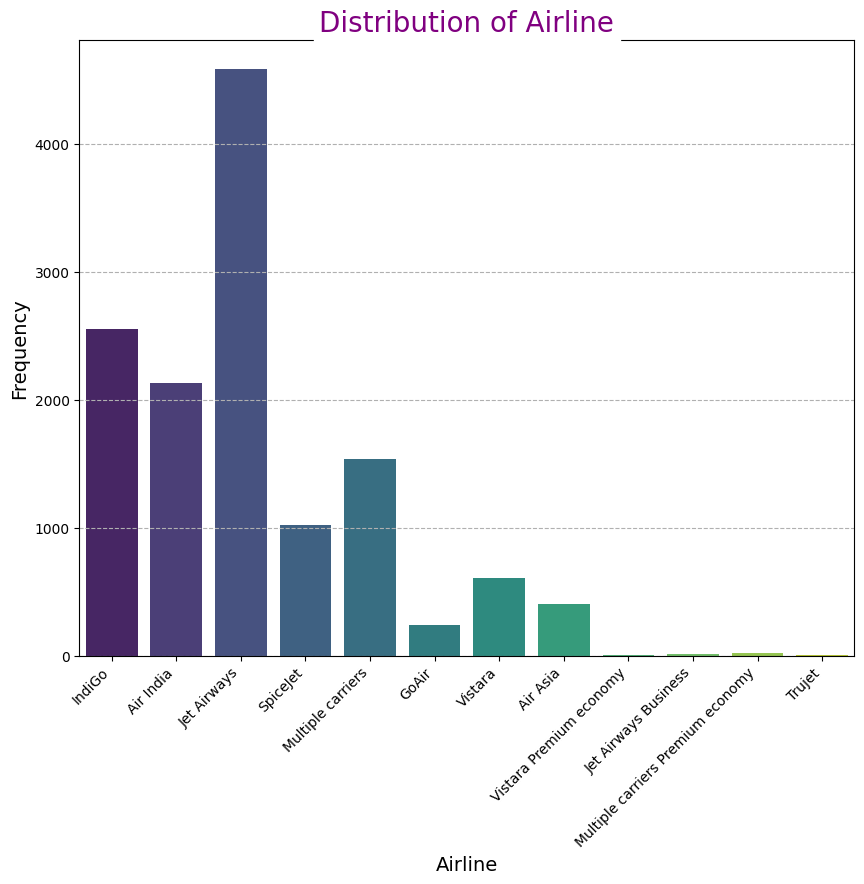

'_______________________________Source Value Count_______________________________'

,Frequency,Source Ratio
Source,,
Delhi,5473,41.75
Kolkata,3567,27.21
Banglore,2729,20.82
Mumbai,883,6.74
Chennai,456,3.48


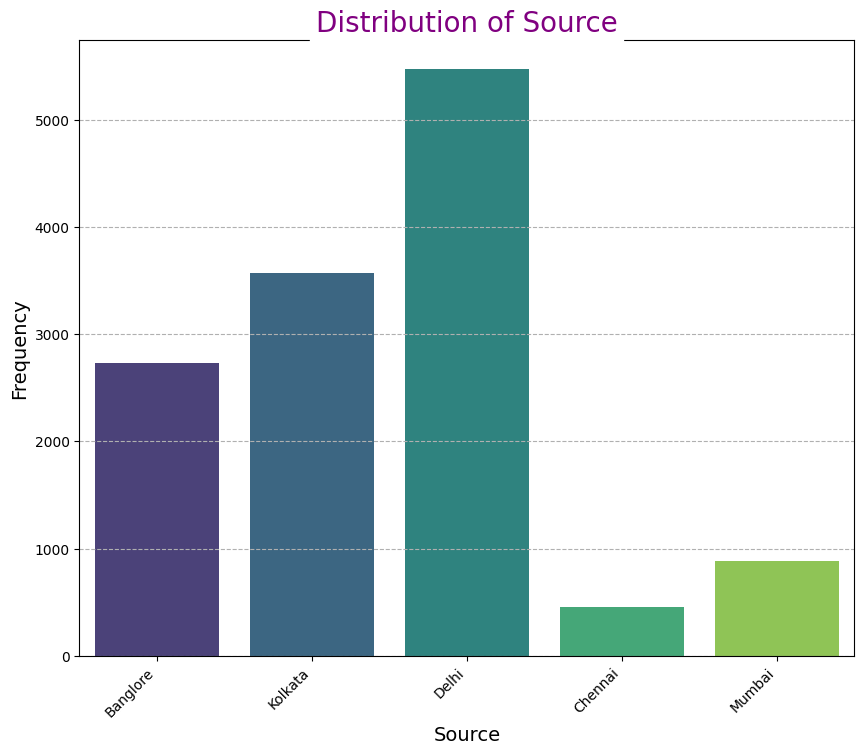

'____________________________Destination Value Count_____________________________'

,Frequency,Destination Ratio
Destination,,
Cochin,5473,41.75
Banglore,3567,27.21
Delhi,1582,12.07
New Delhi,1147,8.75
Hyderabad,883,6.74
Kolkata,456,3.48


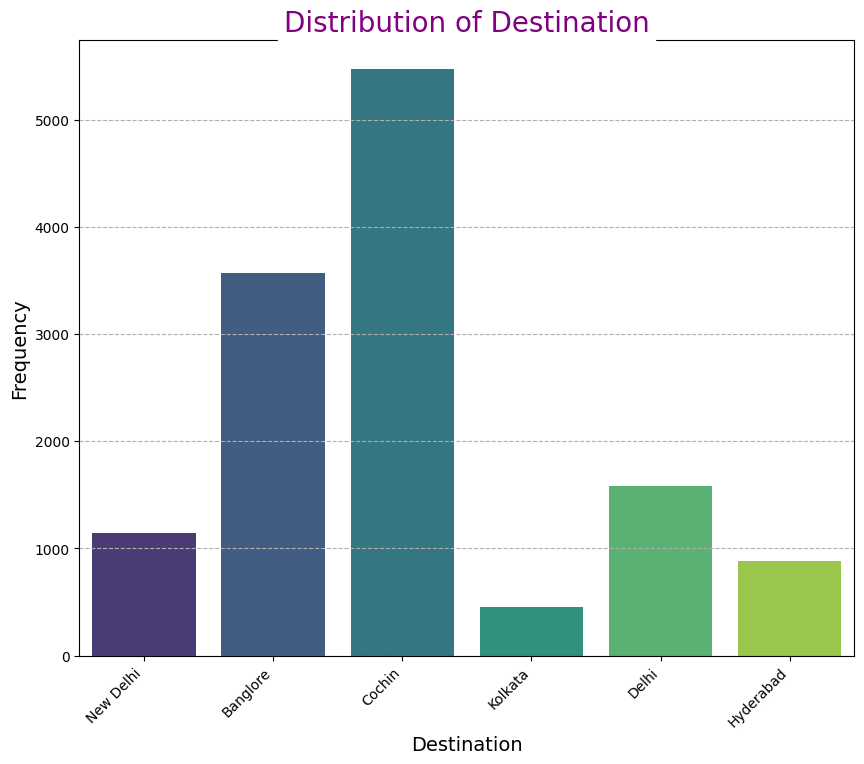

'____________________________Total_Stops Value Count_____________________________'

,Frequency,Total_Stops Ratio
Total_Stops,,
1 stop,7053,53.81
non-stop,4321,32.96
2 stops,1678,12.80
3 stops,54,0.41
4 stops,2,0.02


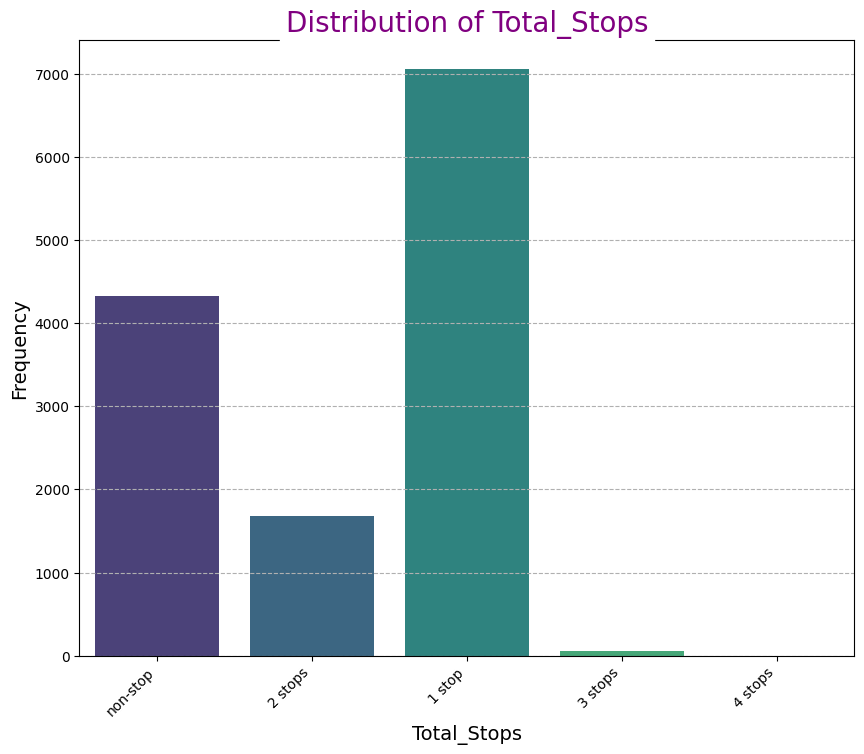

'__________________________Additional_Info Value Count___________________________'

,Frequency,Additional_Info Ratio
Additional_Info,,
No info,10309,78.65
In-flight meal not included,2366,18.05
No check-in baggage included,394,3.01
1 Long layover,20,0.15
Change airports,8,0.06
Business class,5,0.04
No Info,3,0.02
1 Short layover,1,0.01
Red-eye flight,1,0.01


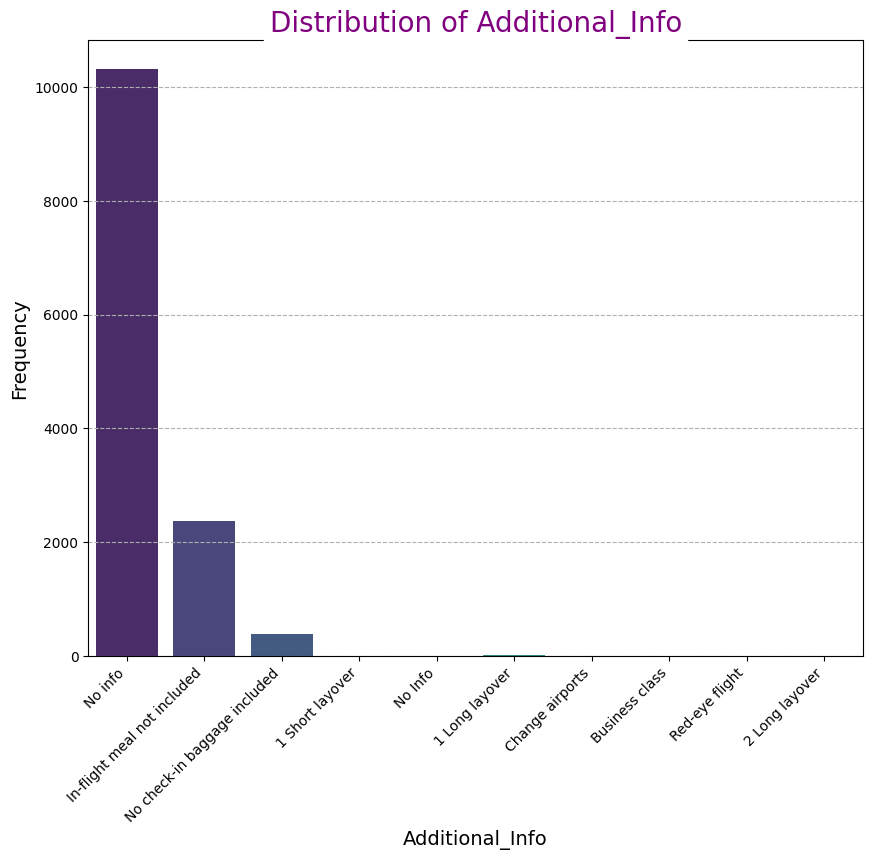

'___________________________Journey_Month Value Count____________________________'

,Frequency,Journey_Month Ratio
Journey_Month,,
5,4253,32.45
6,4170,31.81
3,3360,25.63
4,1325,10.11


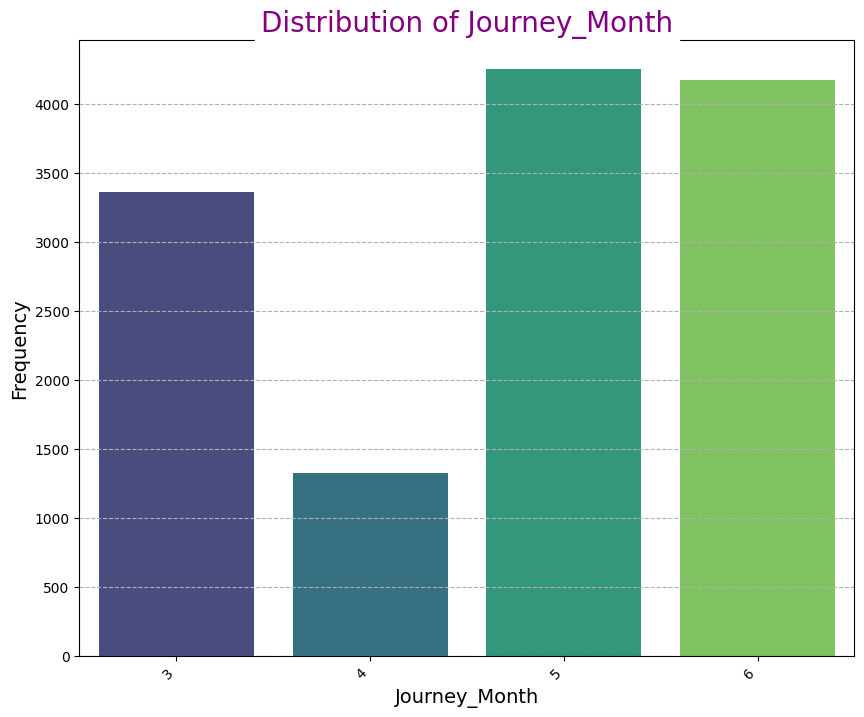

In [40]:
for column in categorical_columns:
    
    # setting the figure size 10x8
    plt.figure(figsize=(10, 8))
    # Counting the frequency of all category inside column
    ColumnCount = df[column].value_counts()
    # diviing the frequency to the number of rows in dataframe
    ColumnRatio = (ColumnCount / df.index.size) * 100
    # storing frequency and ration inside temporary dataframe
    table = pd.DataFrame(
        data={
                'Frequency' : ColumnCount.values,
                f'{column} Ratio' : ColumnRatio.round(2)
            },
        index=ColumnCount.index
        )
    # Writing name of dataframe
    IPython.display.display(f'{column} Value Count'.center(80, '_'))
    # printing dataframe
    IPython.display.display(table)
    # Countplot of each column
    sns.countplot(data=df, x=column, palette='viridis')
    # setting the title of graph
    plt.title(f'Distribution of {column}', fontsize=20, color='purple', backgroundcolor='white')
    # setting x-axis label of graph
    plt.xlabel(column, fontsize=14)
    # setting the y axis label of graph
    plt.ylabel('Frequency', fontsize=14)
    # Rotating the x-axis label at 45 degree and aligning label to right
    plt.xticks(rotation=45, ha='right')
    # Adding grid lines to all graph
    plt.grid(axis='y', linestyle='--')

    plt.show()

**Conclusion:**
* Most number of flights are from Jet Airways 35% followed by IndiGo 19% and Air India 16%.
* Most of the flights start from Delhi 41% followed by Kolkata 27% and Most flight reaches Cochin 41%.
* More than half of flights only have 1 stop.

In [41]:
from typing import List

In [42]:
from typing import List

def mean_analyser(data: pd.DataFrame, categorical_columns: List|pd.Index, target_column: str) -> None:
    '''
    Shows frequency count, frequency ratio, and mean price of each categorical column.
    # Pararmeters
    `data` : Pandas DataFrame Object
    `categorical_columns` : List of categorical columns in data.
    `target_column` : Name of target column
    '''
    for column in categorical_columns:
        count = data[column].value_counts()
        IPython.display.display(f'{column}: {count.index.size}'.center(80, '_'))

        IPython.display.display(pd.DataFrame({
            'Count': count,
            'Ratio' : ((count / data.index.size) * 100).round(2),
            f'Mean {target_column}' : data.groupby(column)['Price'].mean()
        }))

In [43]:
# Not including Route columns, because there are too many routes
mean_analyser(df, categorical_columns, 'Price')

'__________________________________Airline: 12___________________________________'

,Count,Ratio,Mean Price
Airline,,,
Air Asia,405,3.09,5590.260188
Air India,2127,16.23,9555.382891
GoAir,239,1.82,5861.056701
IndiGo,2552,19.47,5668.469897
Jet Airways,4586,34.99,11599.021081
Jet Airways Business,8,0.06,58358.666667
Multiple carriers,1539,11.74,10902.678094
Multiple carriers Premium economy,16,0.12,11418.846154
SpiceJet,1023,7.80,4335.841718


'___________________________________Source: 5____________________________________'

,Count,Ratio,Mean Price
Source,,,
Banglore,2729,20.82,8022.872877
Chennai,456,3.48,4789.892388
Delhi,5473,41.75,10460.914634
Kolkata,3567,27.21,9143.083566
Mumbai,883,6.74,5059.708752


'_________________________________Destination: 6_________________________________'

,Count,Ratio,Mean Price
Destination,,,
Banglore,3567,27.21,9143.083566
Cochin,5473,41.75,10460.914634
Delhi,1582,12.07,5143.918577
Hyderabad,883,6.74,5059.708752
Kolkata,456,3.48,4789.892388
New Delhi,1147,8.75,12007.421225


'_________________________________Total_Stops: 5_________________________________'

,Count,Ratio,Mean Price
Total_Stops,,,
1 stop,7053,53.81,10593.570032
2 stops,1678,12.80,12761.099393
3 stops,54,0.41,13260.674419
4 stops,2,0.02,17686.000000
non-stop,4321,32.96,5018.506763


'______________________________Additional_Info: 10_______________________________'

,Count,Ratio,Mean Price
Additional_Info,,,
1 Long layover,20,0.15,22109.631579
1 Short layover,1,0.01,26743.000000
2 Long layover,1,0.01,26480.000000
Business class,5,0.04,56811.250000
Change airports,8,0.06,16800.714286
In-flight meal not included,2366,18.05,9435.647456
No Info,3,0.02,8044.666667
No check-in baggage included,394,3.01,3642.465409
No info,10309,78.65,9075.062447


'________________________________Journey_Month: 4________________________________'

,Count,Ratio,Mean Price
Journey_Month,,,
3,3360,25.63,10695.397311
4,1325,10.11,5766.545455
5,4253,32.45,9028.783569
6,4170,31.81,8736.152522


Conclusion:
1. Most of Additional Info is No_Info (nearly 80%).
2. The Average Price of Flight in Jet Airways Business is nearly 58000.
3. Flights of Jet Airways Business, Trujet, Vistara Premium Economy and Multiple Carrier Premium Economy are very less as compared to other Airlines.

In [44]:
df.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Duration_Hours,Duration_Mins,Journey_Day,Journey_Month,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897.0,2,50,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662.0,7,25,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882.0,19,0,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218.0,5,25,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302.0,4,45,1,3,16,50,21,35


Mean Flight Price based on No. of Stops and City of Source and Destination.

In [45]:
mean_price_by_stops_source = pd.crosstab(
    index=df['Total_Stops'], 
    columns=[df['Source'], df['Destination']], 
    values=df['Price'], 
    aggfunc='mean'
)
mean_price_by_stops_source

Source          Banglore                    Chennai         Delhi  \
Destination        Delhi     New Delhi      Kolkata        Cochin   
Total_Stops                                                         
1 stop               NaN  14016.540925          NaN  10030.021971   
2 stops              NaN  13278.041096          NaN  12833.929654   
3 stops              NaN  12761.000000          NaN  13202.826087   
4 stops              NaN  17686.000000          NaN           NaN   
non-stop     5143.918577   7458.217712  4789.892388   6315.816901   

Source            Kolkata        Mumbai  
Destination      Banglore     Hyderabad  
Total_Stops                              
1 stop       10477.414395  12520.477273  
2 stops      11994.477663  16696.266667  
3 stops      13151.272727  16276.500000  
4 stops               NaN           NaN  
non-stop      4556.055249   3932.809984

Conclusion: The non-stop flights price are very low as compared with 1 stop, 2 stop...

In [46]:
mean_price_by_stops_source.columns.get_level_values(0)

Index(['Banglore', 'Banglore', 'Chennai', 'Delhi', 'Kolkata', 'Mumbai'], dtype='object', name='Source')

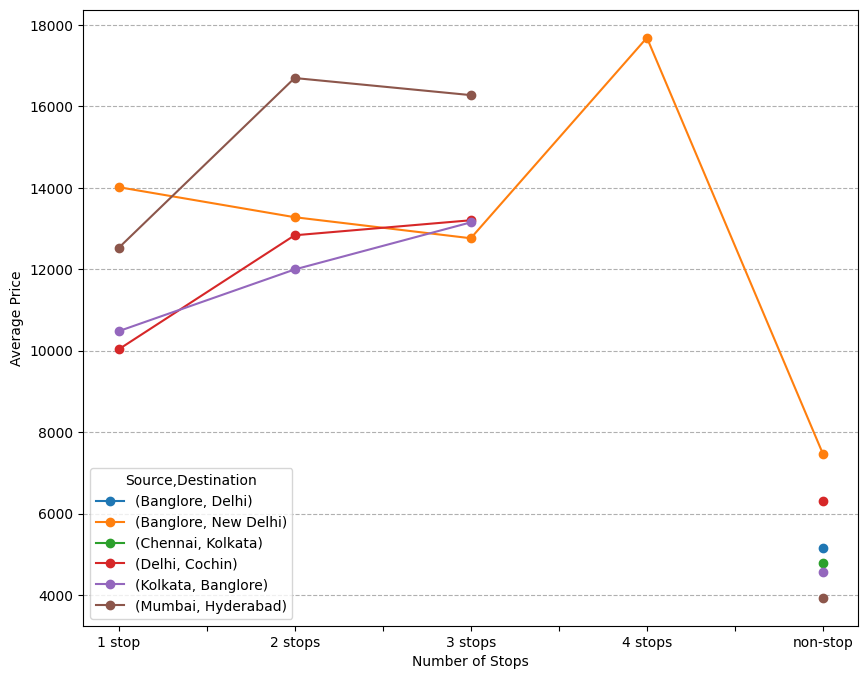

In [47]:
fig, ax = plt.subplots(figsize=(10, 8))
mean_price_by_stops_source.plot(kind='line', ax=ax, legend=True, marker='o')
ax.grid(axis='y', linestyle='--')
ax.set_xlabel('Number of Stops')
ax.set_ylabel('Average Price')
plt.show()

Conclusion: As the number of increase the Price of flights also increases.

In [48]:
mean_price_by_stops_source.columns.map(lambda col: f'{col[0]}-{col[1]}')

Index(['Banglore-Delhi', 'Banglore-New Delhi', 'Chennai-Kolkata',
       'Delhi-Cochin', 'Kolkata-Banglore', 'Mumbai-Hyderabad'],
      dtype='object')

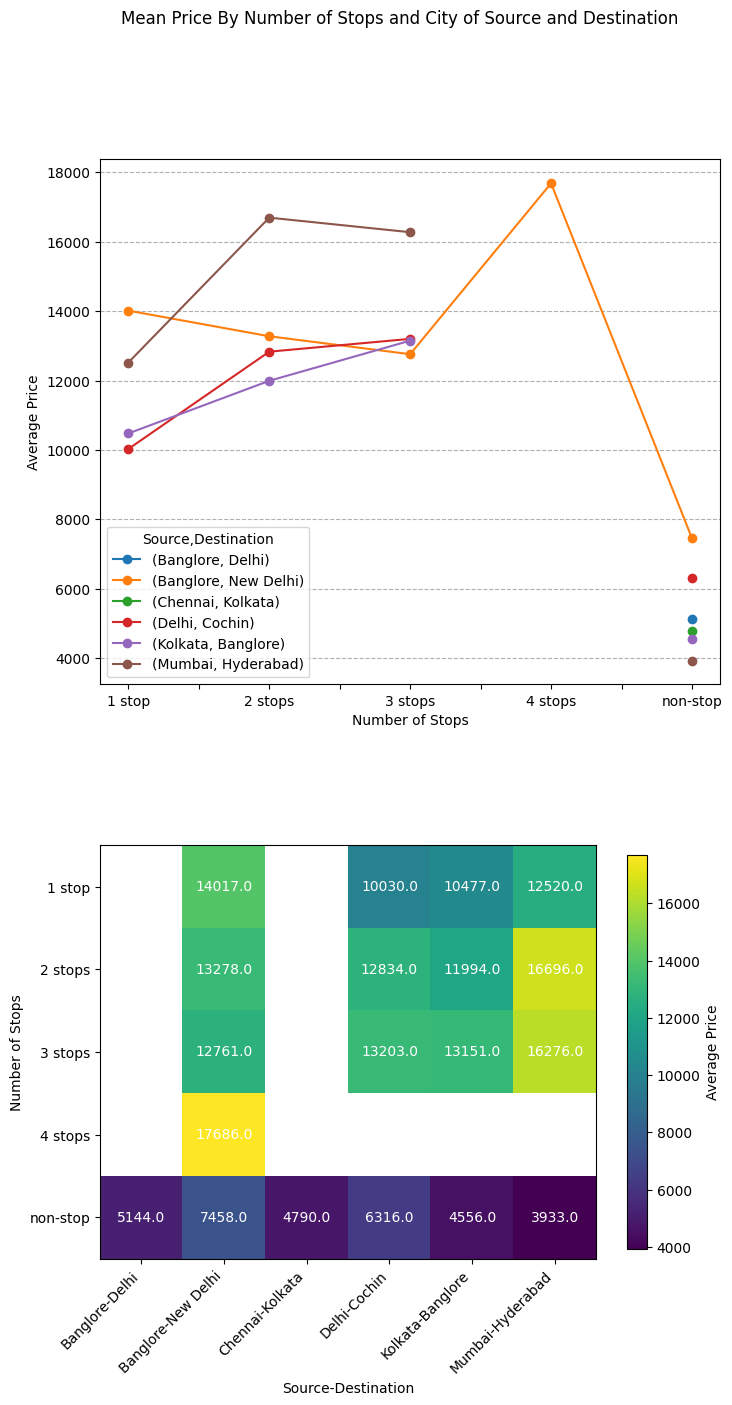

In [49]:
stops = mean_price_by_stops_source.index
source_destination = mean_price_by_stops_source.columns.map(lambda col: f'{col[0]}-{col[1]}')

prices = mean_price_by_stops_source.values 


fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 15))
fig.suptitle('Mean Price By Number of Stops and City of Source and Destination')

mean_price_by_stops_source.plot(kind='line', ax=ax1, legend=True, marker='o')

im = ax2.imshow(prices)
fig.colorbar(im, ax=ax2, label='Average Price', shrink=0.75)

# Show all ticks and label them with the respective list entries
ax2.set_xticks(np.arange(source_destination.size), labels=source_destination, rotation=45, ha='right')
ax2.set_yticks(np.arange(stops.size), labels=stops)


# Loop over data dimensions and create text annotations.
for i in range(source_destination.size):
    for j in range(stops.size):
        if not np.isnan(prices[j, i]):
            text = ax2.text(i, j, prices[j, i].round(),
                       ha="center", va="center", color="w")
        


ax2.set_ylabel('Number of Stops')
ax2.set_xlabel('Source-Destination')
ax1.set_xlabel('Number of Stops')
ax1.set_ylabel('Average Price')
ax1.grid(axis='y', linestyle='--')

plt.show()

Conclusion:
1. Non Stops Flight are have less prices.
2. As number of stops increases flight prices also increases.

In [50]:
df['Airline'].value_counts()

Airline
Jet Airways                          4586
IndiGo                               2552
Air India                            2127
Multiple carriers                    1539
SpiceJet                             1023
Vistara                               607
Air Asia                              405
GoAir                                 239
Multiple carriers Premium economy      16
Jet Airways Business                    8
Vistara Premium economy                 5
Trujet                                  1
Name: count, dtype: int64

As Multiple carriers Premium economy, Jet Airways Business, Vistara Premium economy and Trujet flights are very low so moving these all airlines into 'Others' category.

In [23]:

# All these airlines the list are converted to Others
Others = np.array([
    'Multiple carriers Premium economy',
    'Jet Airways Business',
    'Trujet',
    'Vistara Premium economy'
    ])
# This lambda function returns "Others" if argument is present inside list else it returns argument
Airline_Filter = lambda x: 'Others' if x in Others else x

New_Airline = df['Airline'].apply(Airline_Filter)
New_Airline.value_counts()

Airline
Jet Airways          4586
IndiGo               2552
Air India            2127
Multiple carriers    1539
SpiceJet             1023
Vistara               607
Air Asia              405
GoAir                 239
Others                 30
Name: count, dtype: int64

Airlines, Source and Destination are categorical columns so performing OneHotEncoding

In [122]:
from sklearn.preprocessing import OneHotEncoder

cat_cols = pd.DataFrame({'Airline': New_Airline, 'Source': df['Source'], 'Destination': df['Destination']})

oneht = OneHotEncoder(drop='first', dtype=np.int8)
cat_cols_transform = oneht.fit_transform(cat_cols).toarray()
cat_cols_transform = pd.DataFrame(cat_cols_transform, columns=oneht.get_feature_names_out())

cat_cols_transform.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Multiple carriers,Airline_Others,Airline_SpiceJet,Airline_Vistara,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [27]:
# Dropping Additional_Info Columns as mostly(80%) contains No_info.
# Total_Stops is giving same information
df.drop(columns=['Additional_Info'], inplace=True)

In [28]:
# Replacing the strings in Total_stops ex.['non-stop', '1 stop'] with number [0, 1]
df['Total_Stops'] = df['Total_Stops'].map({
    'non-stop' : 0,
    '1 stop' : 1,
    '2 stops' : 2,
    '3 stops' : 3,
    '4 stops' : 4,
})

In [229]:
df.head()

,Airline,Source,Destination,Route,Total_Stops,Price,Duration_Hours,Duration_Mins,Journey_Day,Journey_Month,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,0,3897.0,2,50,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2,7662.0,7,25,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2,13882.0,19,0,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1,6218.0,5,25,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1,13302.0,4,45,1,3,16,50,21,35


Plotting Route

In [58]:
df.groupby(['Source', 'Destination', 'Route'])['Price'].mean()

Source    Destination  Route                
Banglore  Delhi        BLR → DEL                 5143.918577
          New Delhi    BLR → AMD → DEL          11134.166667
                       BLR → BBI → DEL          11486.000000
                       BLR → BDQ → DEL          11550.500000
                       BLR → BOM → AMD → DEL    14155.750000
                                                    ...     
Mumbai    Hyderabad    BOM → NDC → HYD           4140.000000
                       BOM → RPR → VTZ → HYD     9736.000000
                       BOM → UDR → DEL → HYD    22950.000000
                       BOM → VGA → TIR → HYD             NaN
                       BOM → VNS → DEL → HYD    23528.000000
Name: Price, Length: 134, dtype: float64

In [59]:
Price_by_Route_Source_Dest = pd.crosstab(
    index=df['Route'], 
    columns=[df['Source'], 
    df['Destination']], 
    values=df['Price'], 
    aggfunc='mean'
    )
Price_by_Route_Source_Dest.head()

Source                Banglore               Chennai  Delhi  Kolkata    Mumbai
Destination              Delhi     New Delhi Kolkata Cochin Banglore Hyderabad
Route                                                                         
BLR → AMD → DEL            NaN  11134.166667     NaN    NaN      NaN       NaN
BLR → BBI → DEL            NaN  11486.000000     NaN    NaN      NaN       NaN
BLR → BDQ → DEL            NaN  11550.500000     NaN    NaN      NaN       NaN
BLR → BOM → AMD → DEL      NaN  14155.750000     NaN    NaN      NaN       NaN
BLR → BOM → BHO → DEL      NaN  17211.545455     NaN    NaN      NaN       NaN

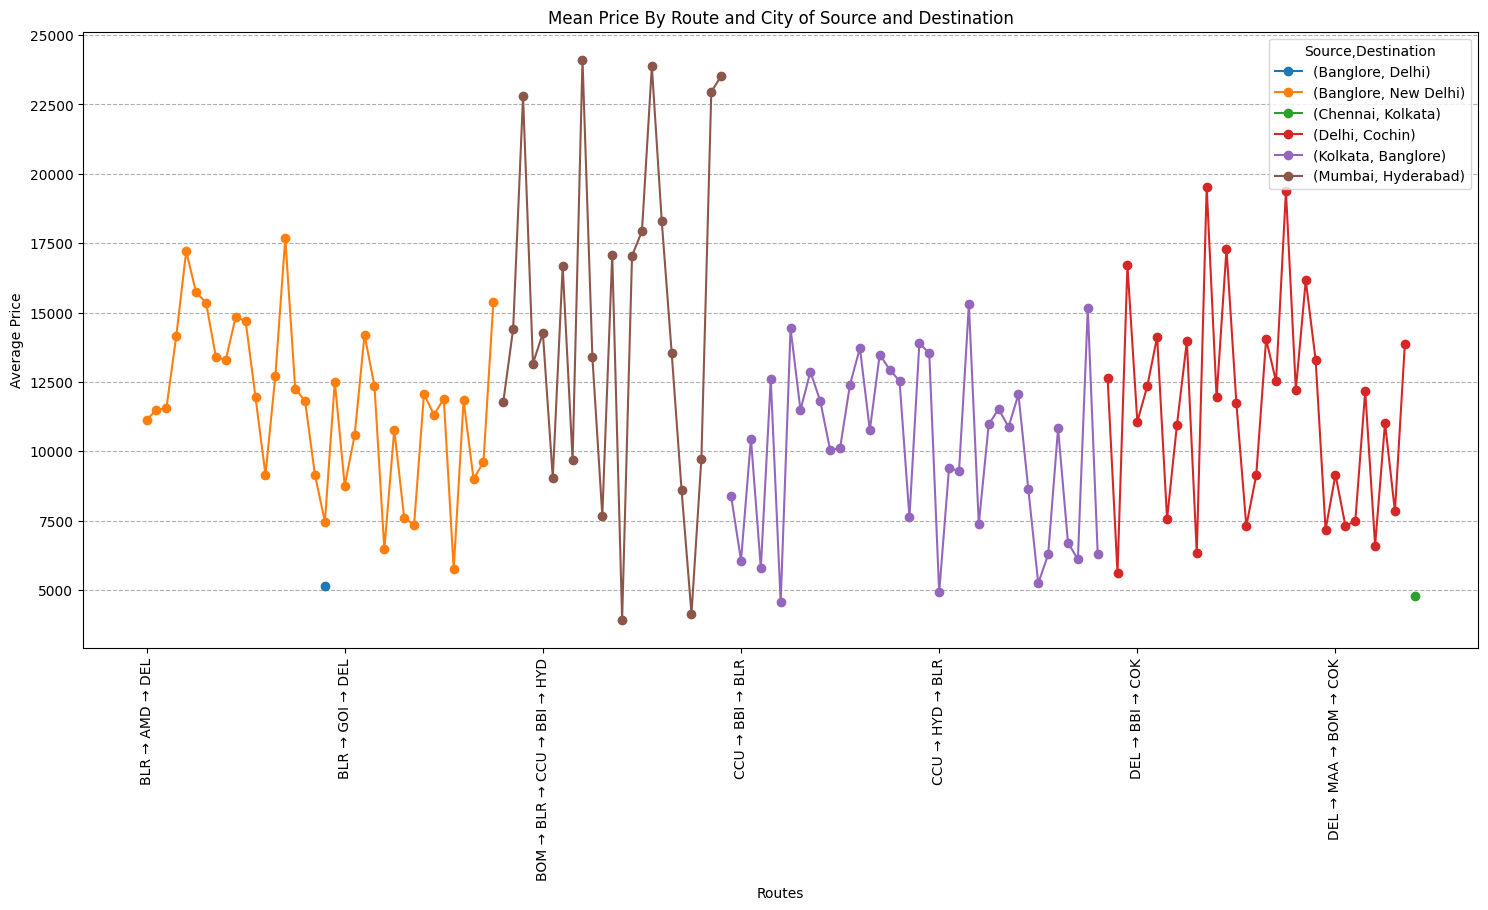

In [60]:
fig, ax = plt.subplots(figsize=(18, 8))
ax.set_title('Mean Price By Route and City of Source and Destination')

plots = Price_by_Route_Source_Dest.plot(kind='line', ax=ax, legend=True, marker='o')
plt.xticks(rotation=90)
        

ax.set_xlabel('Routes')
ax.set_ylabel('Average Price')
ax.grid(axis='y', linestyle='--')

plt.show()

Conclusion:
1. Having same Source and Destination here price is very fluctuating depend on which route is taken.

In [127]:
Route = df['Route'].str.split(' → ', expand=True)
Route.columns = 'Route_' + Route.columns.astype(str)

In [128]:
Route.fillna(value='None', inplace=True)
Route.head()

,Route_0,Route_1,Route_2,Route_3,Route_4,Route_5
0,BLR,DEL,None,None,None,None
1,CCU,IXR,BBI,BLR,None,None
2,DEL,LKO,BOM,COK,None,None
3,CCU,NAG,BLR,None,None,None
4,BLR,NAG,DEL,None,None,None


In [129]:
Route.describe()

,Route_0,Route_1,Route_2,Route_3,Route_4,Route_5
count,13108,13108,13108,13108,13108,13108
unique,5,40,29,12,6,2
top,DEL,BOM,None,None,None,None
freq,5473,4879,4321,11374,13052,13106


As Route column consist information that are available in other columns also like Route_0 is similar to Source column and Route_1, Route_2 is similar to Destination columns and Route_3, Route_4 and Route_5 is moslty None. So I am not using Route column.

In [230]:
df.head()

,Airline,Source,Destination,Route,Total_Stops,Price,Duration_Hours,Duration_Mins,Journey_Day,Journey_Month,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,0,3897.0,2,50,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2,7662.0,7,25,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2,13882.0,19,0,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1,6218.0,5,25,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1,13302.0,4,45,1,3,16,50,21,35


In [232]:
# Adding Airlines, Source, Destination and Route to train 

df_train = df.copy()
df_train.head()

,Airline,Source,Destination,Route,Total_Stops,Price,Duration_Hours,Duration_Mins,Journey_Day,Journey_Month,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,0,3897.0,2,50,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2,7662.0,7,25,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2,13882.0,19,0,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1,6218.0,5,25,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1,13302.0,4,45,1,3,16,50,21,35


In [233]:
df_train.drop(columns=['Route'], inplace=True)

### Saving dataset

In [236]:
import os
os.makedirs('../data/interim', exist_ok=True)
data_test = df_train[df_train['Price'].isna()]
data_train = df_train[df_train['Price'].notna()]

data_test.to_excel('../data/interim/Data_Test.xlsx', index=False)
data_train.to_excel('../data/interim/Data_Train.xlsx', index=False)

In [237]:
# Droping Airline, Source, Destination, Route from train
df_train.drop(columns=['Airline', 'Source', 'Destination'], inplace=True)

In [238]:
df_train.head()

,Total_Stops,Price,Duration_Hours,Duration_Mins,Journey_Day,Journey_Month,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Minute
0,0,3897.0,2,50,24,3,22,20,1,10
1,2,7662.0,7,25,1,5,5,50,13,15
2,2,13882.0,19,0,9,6,9,25,4,25
3,1,6218.0,5,25,12,5,18,5,23,30
4,1,13302.0,4,45,1,3,16,50,21,35


Joining categorical dataframe

In [148]:
df_train = pd.concat([df_train, cat_cols_transform], axis=1)
df_train.head()

,Total_Stops,Price,Duration_Hours,Duration_Mins,Journey_Day,Journey_Month,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Minute,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Multiple carriers,Airline_Others,Airline_SpiceJet,Airline_Vistara,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897.0,2,50,24,3,22,20,1,10,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,7662.0,7,25,1,5,5,50,13,15,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,13882.0,19,0,9,6,9,25,4,25,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,6218.0,5,25,12,5,18,5,23,30,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,13302.0,4,45,1,3,16,50,21,35,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [149]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13108 entries, 0 to 13107
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Total_Stops                13108 non-null  int64  
 1   Price                      10463 non-null  float64
 2   Duration_Hours             13108 non-null  int32  
 3   Duration_Mins              13108 non-null  int32  
 4   Journey_Day                13108 non-null  int32  
 5   Journey_Month              13108 non-null  int32  
 6   Dep_Hour                   13108 non-null  int32  
 7   Dep_Min                    13108 non-null  int32  
 8   Arrival_Hour               13108 non-null  int32  
 9   Arrival_Minute             13108 non-null  int32  
 10  Airline_Air India          13108 non-null  int8   
 11  Airline_GoAir              13108 non-null  int8   
 12  Airline_IndiGo             13108 non-null  int8   
 13  Airline_Jet Airways        13108 non-null  int

### Feature Selection
Finding best features which fits best with target variable
* Checking Feature importance
* Checking multicollinearity

In [69]:
# Splitting Train and Test data

In [150]:
# test data
df_test = df_train[df_train['Price'].isna()]

# train data
df_train = df_train.dropna(subset=['Price'])

# droping Price column from test as it is null
df_test = df_test.drop(columns=['Price'])

In [151]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [153]:
df_train_features = df_train.drop(columns=['Price'])
df_train_target = df_train['Price']

# scaler = StandardScaler()

# df_train_features_scaled = scaler.fit_transform(df_train_features)

In [154]:
df_train_features.columns

Index(['Total_Stops', 'Duration_Hours', 'Duration_Mins', 'Journey_Day',
       'Journey_Month', 'Dep_Hour', 'Dep_Min', 'Arrival_Hour',
       'Arrival_Minute', 'Airline_Air India', 'Airline_GoAir',
       'Airline_IndiGo', 'Airline_Jet Airways', 'Airline_Multiple carriers',
       'Airline_Others', 'Airline_SpiceJet', 'Airline_Vistara',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi'],
      dtype='object')

In [159]:
pipe = Pipeline(
    steps=[
        'scaler', StandardScaler()
    ]
)
transformer = ColumnTransformer(
    transformers=[
        (
            'ScalePipe', 
            StandardScaler(), 
            [
                'Total_Stops', 'Duration_Hours', 'Duration_Mins', 'Journey_Day', 'Journey_Month', 'Dep_Hour', 'Dep_Min', 'Arrival_Hour', 'Arrival_Minute'
            ]
        )
    ]
)

In [163]:
df_train_features_scaled = transformer.fit_transform(df_train_features)

In [170]:
df_test_features_scaled = transformer.fit_transform(df_test)

In [164]:
pd.DataFrame(df_train_features_scaled)

,0,1,2,3,4,5,6,7,8
0,-1.214674,-0.958135,1.290954,1.244539,-1.462170,1.662686,-0.234226,-1.807035,-0.888411
1,1.813113,-0.361347,-0.190267,-1.471890,0.256494,-1.305823,1.360247,-0.056494,-0.586640
2,1.813113,1.070945,-1.671488,-0.527045,1.115825,-0.607350,0.031520,-1.369400,0.016901
3,0.299219,-0.600062,-0.190267,-0.172728,0.256494,0.964213,-1.031462,1.402289,0.318672
4,0.299219,-0.719420,0.994710,-1.471890,-1.462170,0.614977,1.360247,1.110533,0.620443
...,...,...,...,...,...,...,...,...,...
10458,-1.214674,-0.958135,0.105977,-0.527045,-0.602838,1.138832,1.625992,1.256411,0.016901
10459,-1.214674,-0.958135,0.402222,1.598856,-0.602838,1.313450,1.094501,1.402289,-0.284870
10460,-1.214674,-0.838777,-1.671488,1.598856,-0.602838,-0.781968,-0.234226,-0.348251,-0.284870
10461,-1.214674,-0.958135,0.698466,-1.471890,-1.462170,-0.258114,0.297265,0.089384,-0.888411


In [168]:
columns = ['Total_Stops', 'Duration_Hours', 'Duration_Mins', 'Journey_Day', 'Journey_Month', 'Dep_Hour', 'Dep_Min', 'Arrival_Hour', 'Arrival_Minute']
df_train_scaled = pd.concat([
    pd.DataFrame(df_train_features_scaled, columns=columns),
    df_train_features.drop(columns=columns)
    ], axis=1)

In [173]:
df_test_scaled = pd.concat([
    pd.DataFrame(df_test_features_scaled, columns=columns),
    df_test.drop(columns=columns)
], axis=1)

In [169]:
df_train_scaled.head()

,Total_Stops,Duration_Hours,Duration_Mins,Journey_Day,Journey_Month,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Minute,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Multiple carriers,Airline_Others,Airline_SpiceJet,Airline_Vistara,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,-1.214674,-0.958135,1.290954,1.244539,-1.462170,1.662686,-0.234226,-1.807035,-0.888411,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,1.813113,-0.361347,-0.190267,-1.471890,0.256494,-1.305823,1.360247,-0.056494,-0.586640,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,1.813113,1.070945,-1.671488,-0.527045,1.115825,-0.607350,0.031520,-1.369400,0.016901,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0
3,0.299219,-0.600062,-0.190267,-0.172728,0.256494,0.964213,-1.031462,1.402289,0.318672,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,0.299219,-0.719420,0.994710,-1.471890,-1.462170,0.614977,1.360247,1.110533,0.620443,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1


### Saving datasets

In [228]:
import os
os.makedirs('../data/processed', exist_ok=True)

_df_train_scaled = df_train_scaled.copy()
_df_train_scaled['Price'] = df_train_target
_df_train_scaled.to_excel('../data/processed/Data_Train.xlsx', index=False)
df_test_scaled.to_excel('../data/processed/Data_Test.xlsx', index=False)

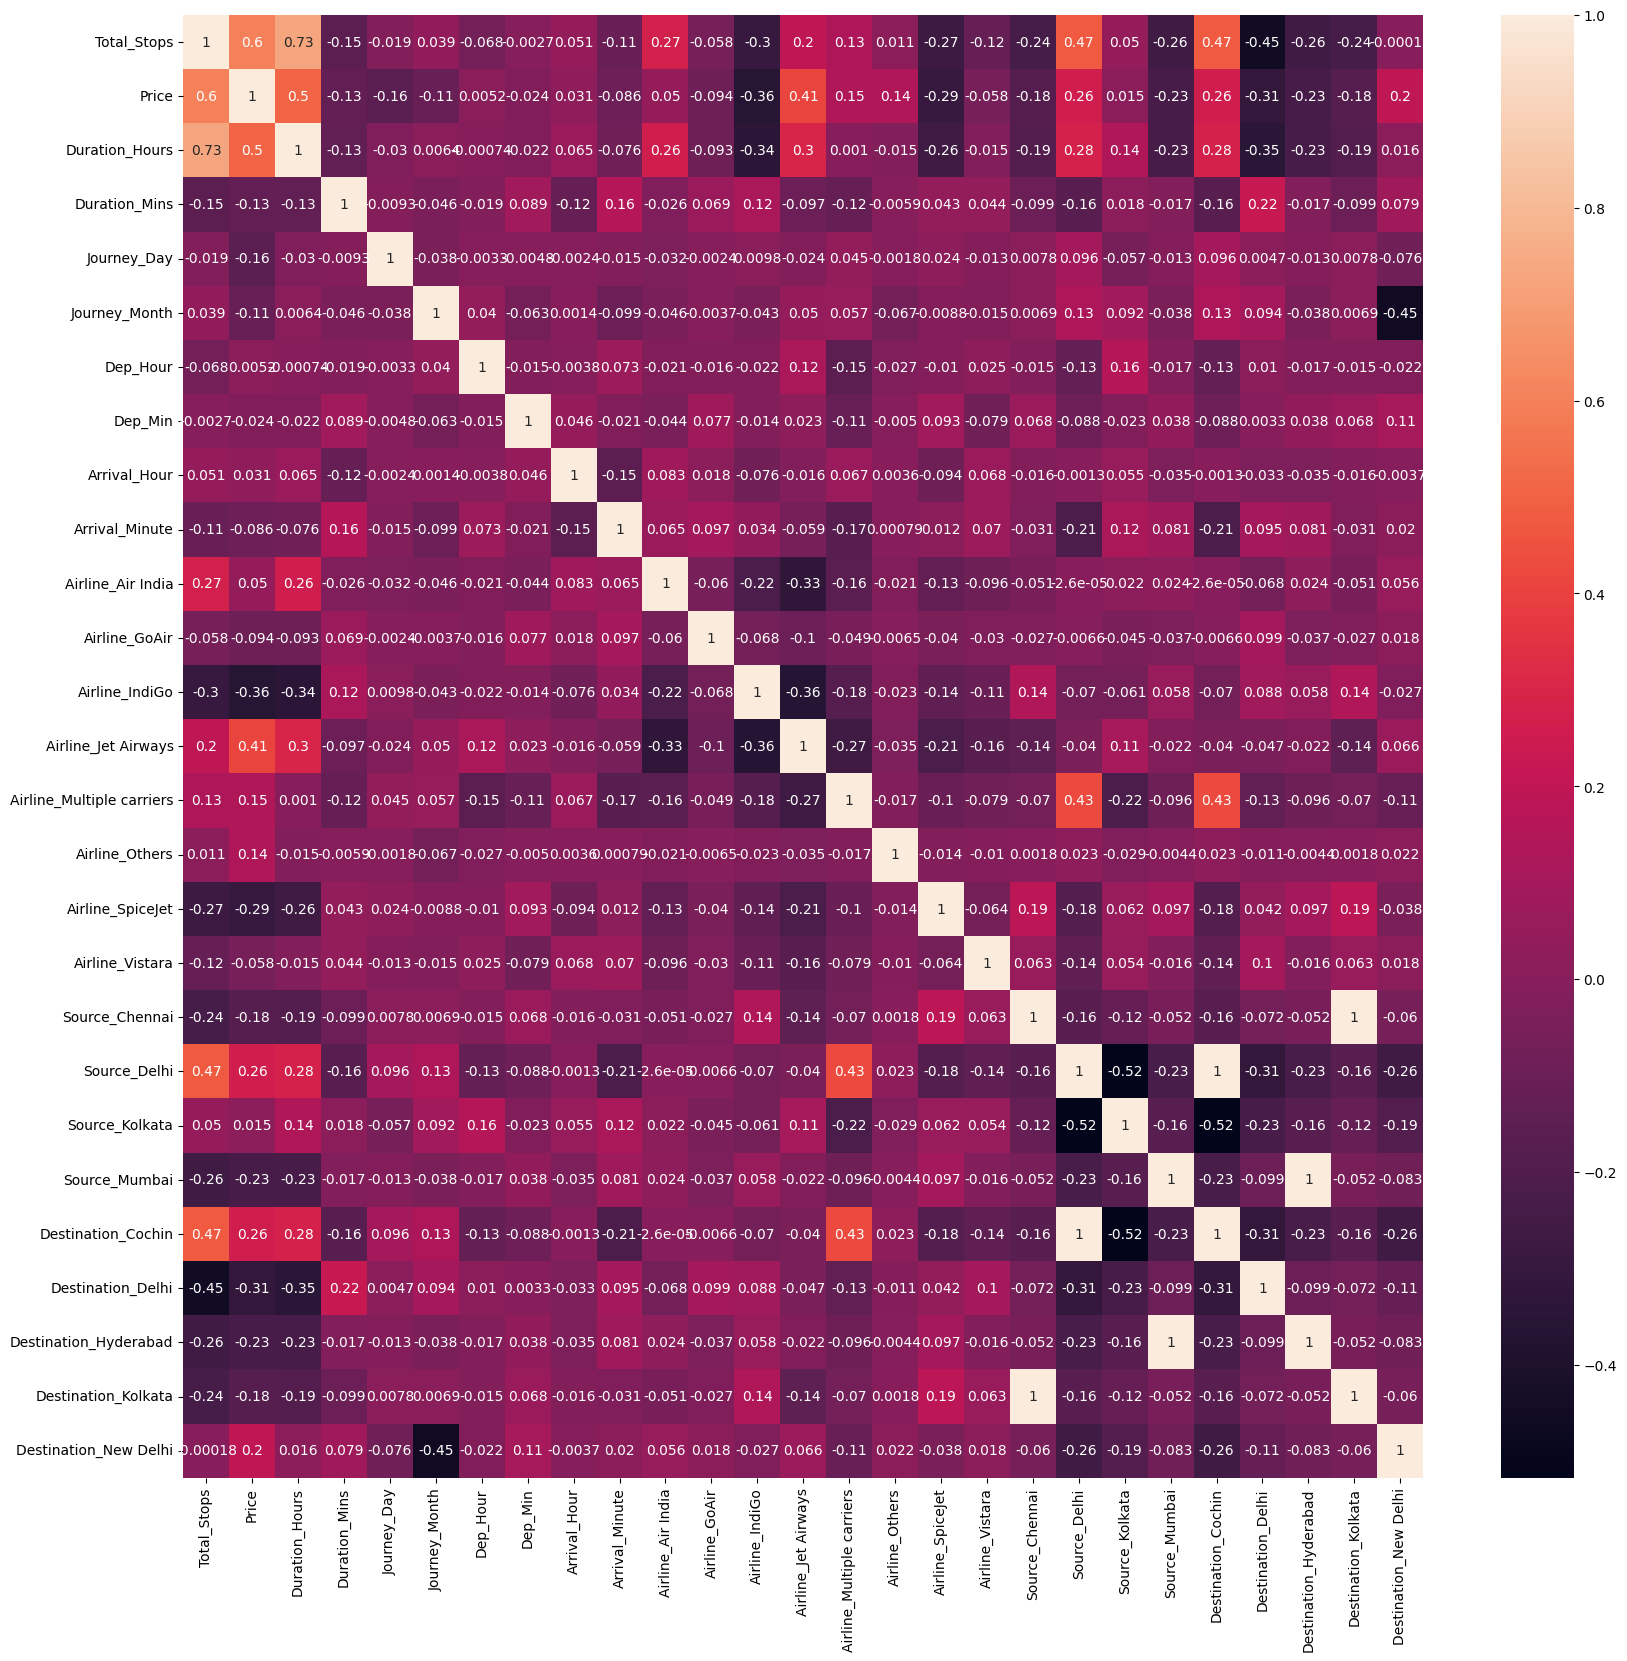

In [176]:
plt.figure(figsize=(20, 19))
sns.heatmap(df_train.corr(), annot=True)
plt.show()

In [78]:
# Splitting Train data into feature and target

In [175]:
df_train_scaled.columns

Index(['Total_Stops', 'Duration_Hours', 'Duration_Mins', 'Journey_Day',
       'Journey_Month', 'Dep_Hour', 'Dep_Min', 'Arrival_Hour',
       'Arrival_Minute', 'Airline_Air India', 'Airline_GoAir',
       'Airline_IndiGo', 'Airline_Jet Airways', 'Airline_Multiple carriers',
       'Airline_Others', 'Airline_SpiceJet', 'Airline_Vistara',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi'],
      dtype='object')

In [177]:
X = df_train_scaled
y = df_train_target

models = {}
plots = {}


In [178]:
predictions = {}

In [179]:
def store_detail(modelname: str, model, figure):
    models[modelname] = model
    plots[modelname] = figure


In [180]:
X.shape

(10463, 26)

In [181]:
X

,Total_Stops,Duration_Hours,Duration_Mins,Journey_Day,Journey_Month,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Minute,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Multiple carriers,Airline_Others,Airline_SpiceJet,Airline_Vistara,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,-1.214674,-0.958135,1.290954,1.244539,-1.462170,1.662686,-0.234226,-1.807035,-0.888411,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,1.813113,-0.361347,-0.190267,-1.471890,0.256494,-1.305823,1.360247,-0.056494,-0.586640,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,1.813113,1.070945,-1.671488,-0.527045,1.115825,-0.607350,0.031520,-1.369400,0.016901,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0
3,0.299219,-0.600062,-0.190267,-0.172728,0.256494,0.964213,-1.031462,1.402289,0.318672,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,0.299219,-0.719420,0.994710,-1.471890,-1.462170,0.614977,1.360247,1.110533,0.620443,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10458,-1.214674,-0.958135,0.105977,-0.527045,-0.602838,1.138832,1.625992,1.256411,0.016901,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
10459,-1.214674,-0.958135,0.402222,1.598856,-0.602838,1.313450,1.094501,1.402289,-0.284870,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
10460,-1.214674,-0.838777,-1.671488,1.598856,-0.602838,-0.781968,-0.234226,-0.348251,-0.284870,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
10461,-1.214674,-0.958135,0.698466,-1.471890,-1.462170,-0.258114,0.297265,0.089384,-0.888411,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1


In [182]:
y

0         3897.0
1         7662.0
2        13882.0
3         6218.0
4        13302.0
          ...   
10458     4107.0
10459     4145.0
10460     7229.0
10461    12648.0
10462    11753.0
Name: Price, Length: 10463, dtype: float64

### LightGBM
LightGBM is a gradient boosting framework that uses tree based learning algorithms. LightGBM also have low memory usage.

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000705 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 184
[LightGBM] [Info] Number of data points in the train set: 8370, number of used features: 25
[LightGBM] [Info] Start training from score 9013.127240


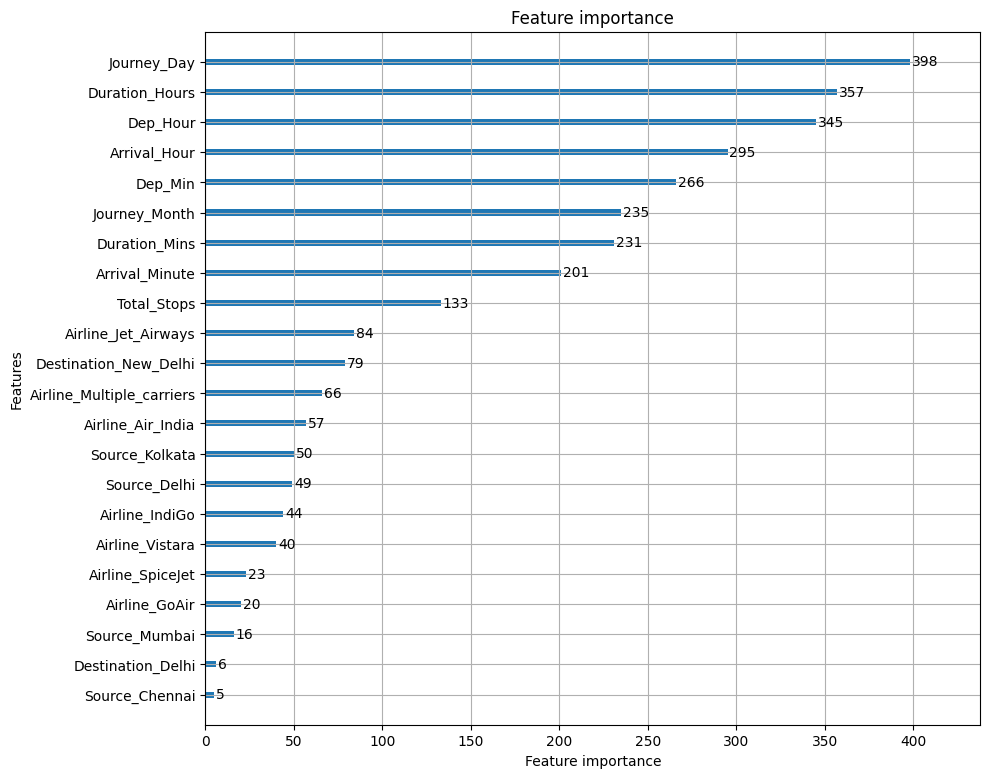

In [183]:
from lightgbm import LGBMRegressor, plot_importance
lgb = LGBMRegressor(objective = "regression", importance_type='split')
fig, ax = plt.subplots(figsize=(10, 9))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=14)
lgb.fit(X_train, y_train)
plot_lgb = plot_importance(lgb, ax=ax)

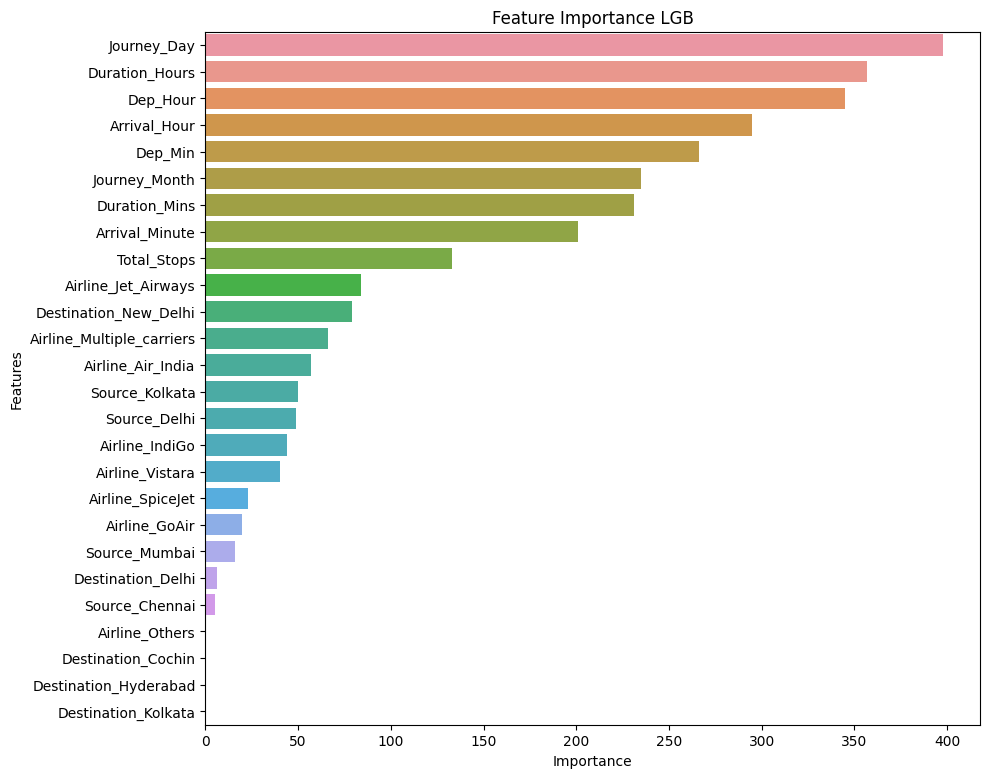

In [184]:
fig, ax = plt.subplots(figsize=(10, 9))
lgb_importance = pd.Series(data=lgb.feature_importances_, index=lgb.feature_name_).sort_values(ascending=False)
lgb_importance_plot = sns.barplot(x=lgb_importance.values, y=lgb_importance.index, ax=ax)
ax.set_title('Feature Importance LGB')
ax.set_xlabel('Importance')
ax.set_ylabel('Features')
plt.show()

'Destination_Hyderabad', 'Destination_Kolkata', 'Destination_Cochin', 'Airline_Others' features have very low importance.

In [185]:
predictions['LightGBM'] = lgb.predict(X_test)

Conclusion: From LGBMRegressor we have find out the importance of each feature. Here I am checking again the importance with xgboost.

In [186]:
drop_columns_lgb = [
    'Airline_Others', 'Source_Chennai', 'Destination_Cochin', 
    'Destination_Delhi', 'Destination_Hyderabad',
    'Destination_Kolkata',
    ]

In [187]:
store_detail('LightGBM', lgb, fig)

### Extra Tree Regression
ExtraTreesRegressor:-
1) It is a ensemble learning methods that uses in Decision Trees. The ExtraTree algorithm is like a the random forest algorithm, create many decision tree,but the sampling for each tree is random, without replacement.
 
 2) Extra Tree algo. does not performe bootstrap aggregation.In simple words,takes random subset of data without replacement.
 
 3) The main advantages of Extra Tree is the reduction of bias.

In [188]:
from sklearn.ensemble import ExtraTreesRegressor

extra_tree = ExtraTreesRegressor(
    n_estimators=100,
    criterion='squared_error',
)
extra_tree.fit(X_train, y_train)

ExtraTreesRegressor()

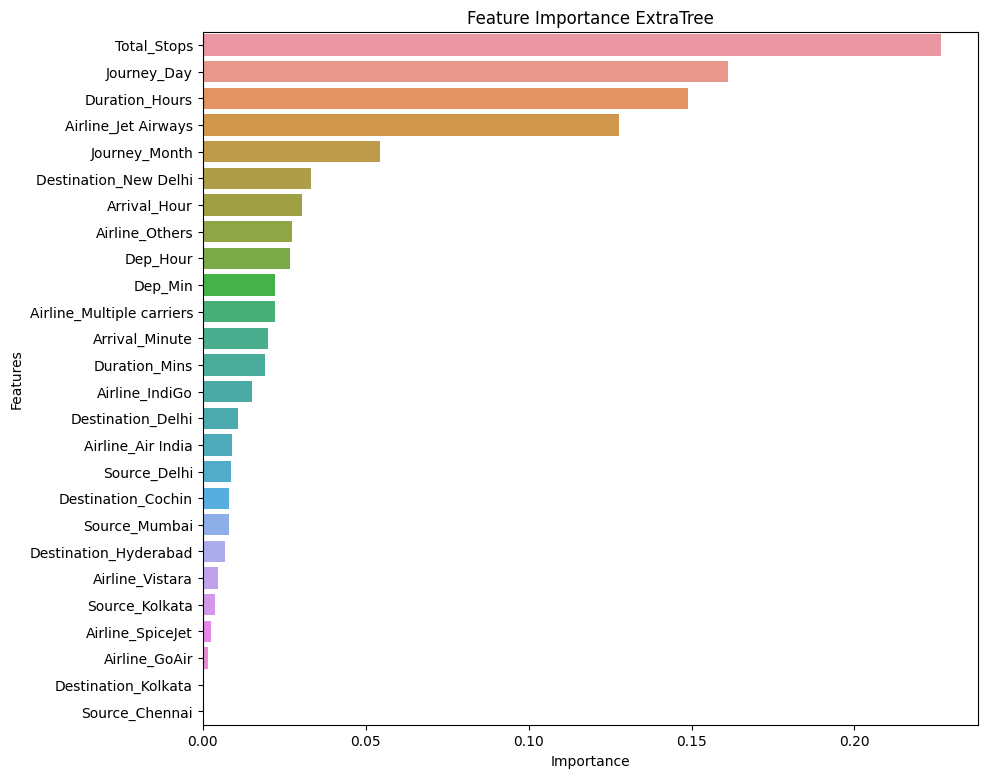

In [189]:
fig , ax = plt.subplots(figsize=(10, 9))

extra_tree_importance = pd.Series(data=extra_tree.feature_importances_, index=extra_tree.feature_names_in_).sort_values(ascending=False)
sns.barplot(x=extra_tree_importance.values, y=extra_tree_importance.index, ax=ax)
ax.set_title('Feature Importance ExtraTree')
ax.set_xlabel('Importance')
ax.set_ylabel('Features')
plt.show()

'Source_Chennai', 'Destination_Kolkata', 'Airline_GoAir' have very low importance.

In [190]:
predictions['ExtraTree'] = extra_tree.predict(X_test)

In [191]:
drop_columns_extra_tree = [
    'Destinatio_Cochin', 'Airline_SpiceJet', 'Source_Kolkata', 
    'Destination_Delhi', 'Airline_GoAir', 'Destination_Kolkata',
    'Source_Chennai'
]

In [192]:
store_detail('ExtraTree', extra_tree, fig)

### XGBoost
XGBoost is an optimized distributed gradient boosting library designed to be highly efficient, flexible and portable.

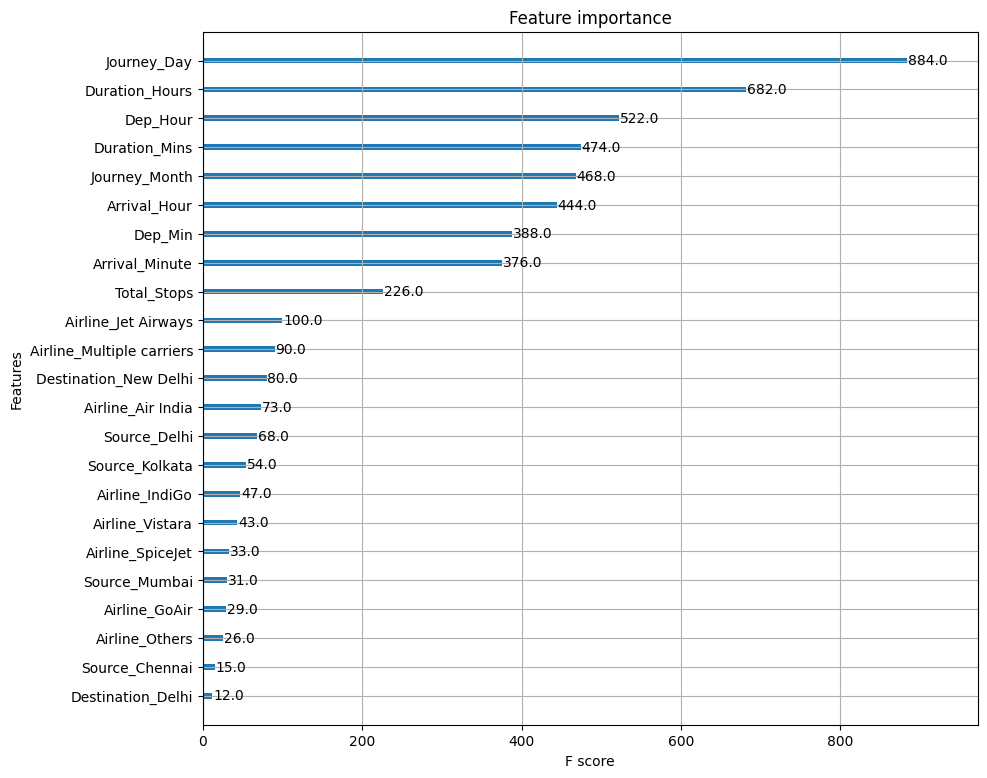

In [193]:
import xgboost
from xgboost.plotting import plot_importance

# creating figure and axes
fig, ax = plt.subplots(figsize=(10, 9))

xgb = xgboost.XGBRegressor(objective='reg:squarederror', importance_type='gain')
xgb.fit(X_train, y_train)
plot_xgb = plot_importance(xgb, ax=ax);

In [194]:
temp = xgb.get_booster()

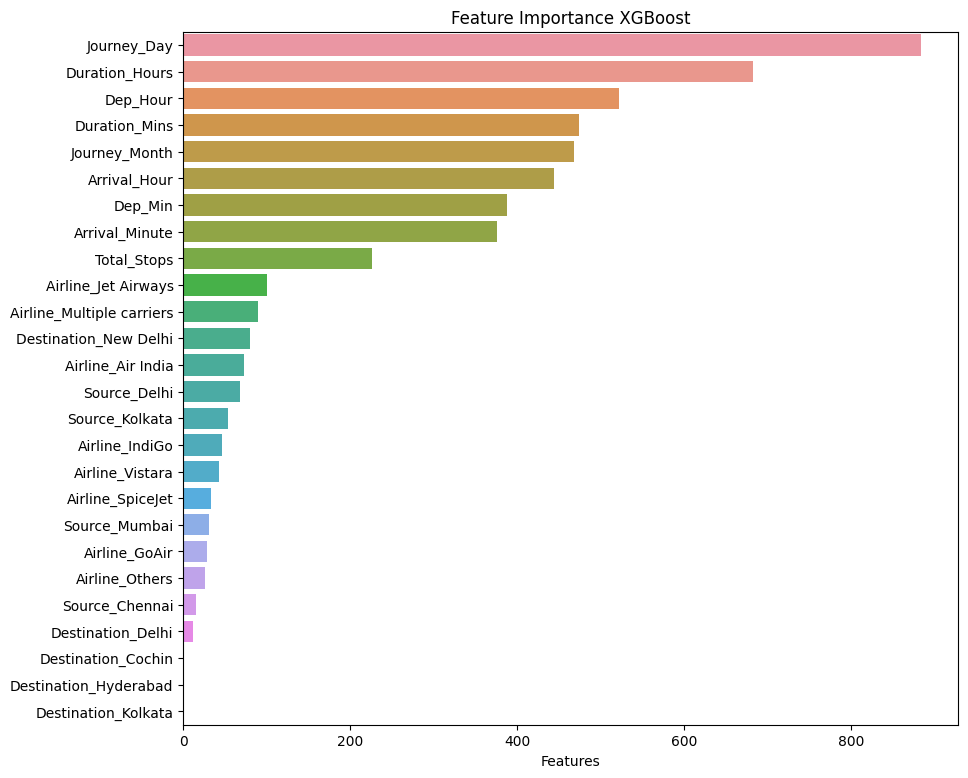

In [195]:
xgb_fscore:dict = temp.get_fscore()
cols = []
f_score = []
for col in xgb.feature_names_in_:
    cols.append(col)
    f_score.append(xgb_fscore.get(col, 0))
xgb_importance = pd.Series(index=cols, data=f_score).sort_values(ascending=False)

fig, ax = plt.subplots(figsize=(10, 9))
sns.barplot(x=xgb_importance.values, y=xgb_importance.index, ax=ax)
ax.set_title('Feature Importance XGBoost')
ax.set_xlabel('Importance')
ax.set_xlabel('Features')
plt.show()

Similar to previous model 'Destination_Delhi', 'Destination_Cochin', 'Destination_Hyderabad', 'Destination_Kolkata' have very low importance.

In [196]:
predictions['XGBoost'] = xgb.predict(X_test)

In [197]:
# dropping these columns
drop_columns_xgb = [
    'Airline_Others', 'Airline_SpiceJet', 'Airline_GoAir', 
    'Source_Chennai', 'Source_Kolkata', 'Source_Mumbai', 
    'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad', 
    'Destination_Kolkata'
]

In [198]:
store_detail('XGBoost', xgb, fig)

## Random Forest

In [199]:
from sklearn.ensemble import RandomForestRegressor

random_forest = RandomForestRegressor(n_estimators=100, criterion='squared_error', bootstrap=True, verbose=1)

random_forest.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    2.4s


RandomForestRegressor(verbose=1)

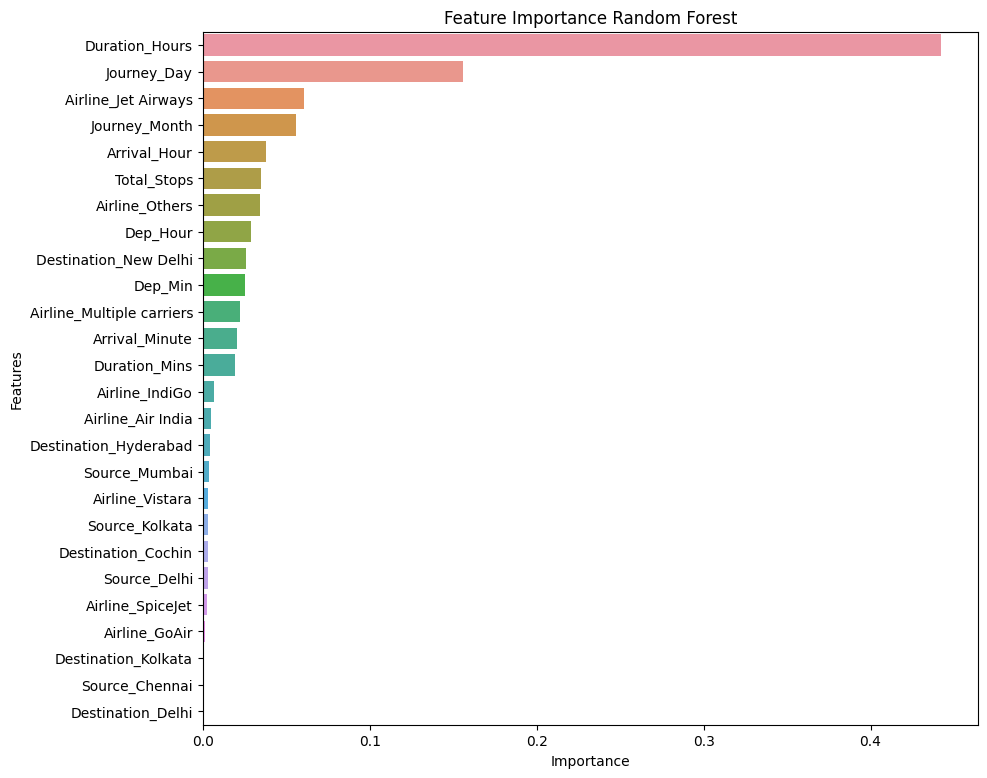

In [200]:
fig , ax = plt.subplots(figsize=(10, 9))

random_forest_importance = pd.Series(data=random_forest.feature_importances_, index=random_forest.feature_names_in_).sort_values(ascending=False)
random_forest_plot = sns.barplot(x=random_forest_importance.values, y=random_forest_importance.index, ax=ax)
ax.set_title('Feature Importance Random Forest')
ax.set_xlabel('Importance')
ax.set_ylabel('Features')
plt.show()

Here we can see there a 13 features have very low importance.

In [201]:
predictions['RandomForest'] = random_forest.predict(X_test)

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


In [202]:
store_detail('RandomForest', random_forest, fig)

Importance of All Features

In [203]:
all_importance = pd.DataFrame(
    index=xgb_importance.sort_index().index,
    data={
        'LightGBM' : lgb_importance.sort_index().values,
        'XGBoost' : xgb_importance.sort_index().values,
        'ExtraTree' : extra_tree_importance.sort_index().values,
        'RandomForest' : random_forest_importance.sort_index().values
    }
             )

In [204]:
all_importance

,LightGBM,XGBoost,ExtraTree,RandomForest
Airline_Air India,57,73.0,0.009121,0.004781
Airline_GoAir,20,29.0,0.001519,0.001184
Airline_IndiGo,44,47.0,0.015157,0.006653
Airline_Jet Airways,84,100.0,0.127857,0.060489
Airline_Multiple carriers,66,90.0,0.022098,0.022517
Airline_Others,0,26.0,0.027357,0.034182
Airline_SpiceJet,23,33.0,0.002487,0.002631
Airline_Vistara,40,43.0,0.004648,0.003300
Arrival_Hour,295,444.0,0.030470,0.037713
Arrival_Minute,201,376.0,0.020054,0.020353


Creating a `Cross` column in importance dataframe which is product of importance of all model.

In [205]:
from sklearn.preprocessing import MinMaxScaler

min_max_scale = MinMaxScaler((1, 1.1))
all_importance['Cross'] = min_max_scale.fit_transform(all_importance[['LightGBM']]) * min_max_scale.fit_transform(all_importance[['XGBoost']]) * min_max_scale.fit_transform(all_importance[['ExtraTree']]) * min_max_scale.fit_transform(all_importance[['RandomForest']])

In [206]:
all_importance

,LightGBM,XGBoost,ExtraTree,RandomForest,Cross
Airline_Air India,57,73.0,0.009121,0.004781,1.027673
Airline_GoAir,20,29.0,0.001519,0.001184,1.009011
Airline_IndiGo,44,47.0,0.015157,0.006653,1.024526
Airline_Jet Airways,84,100.0,0.127857,0.060489,1.105731
Airline_Multiple carriers,66,90.0,0.022098,0.022517,1.041991
Airline_Others,0,26.0,0.027357,0.034182,1.022672
Airline_SpiceJet,23,33.0,0.002487,0.002631,1.010987
Airline_Vistara,40,43.0,0.004648,0.003300,1.017550
Arrival_Hour,295,444.0,0.030470,0.037713,1.152741
Arrival_Minute,201,376.0,0.020054,0.020353,1.109707


Sorting importance by `Cross`

In [207]:
all_importance.sort_values(by='Cross', ascending=False)

,LightGBM,XGBoost,ExtraTree,RandomForest,Cross
Duration_Hours,357,682.0,0.148800,0.442126,1.375867
Journey_Day,398,884.0,0.161306,0.155906,1.341758
Total_Stops,133,226.0,0.226518,0.035110,1.175030
Dep_Hour,345,522.0,0.026678,0.029126,1.171812
Journey_Month,235,468.0,0.054325,0.055763,1.156031
Arrival_Hour,295,444.0,0.030470,0.037713,1.152741
Dep_Min,266,388.0,0.022210,0.025004,1.130677
Duration_Mins,231,474.0,0.019146,0.019414,1.128866
Arrival_Minute,201,376.0,0.020054,0.020353,1.109707
Airline_Jet Airways,84,100.0,0.127857,0.060489,1.105731


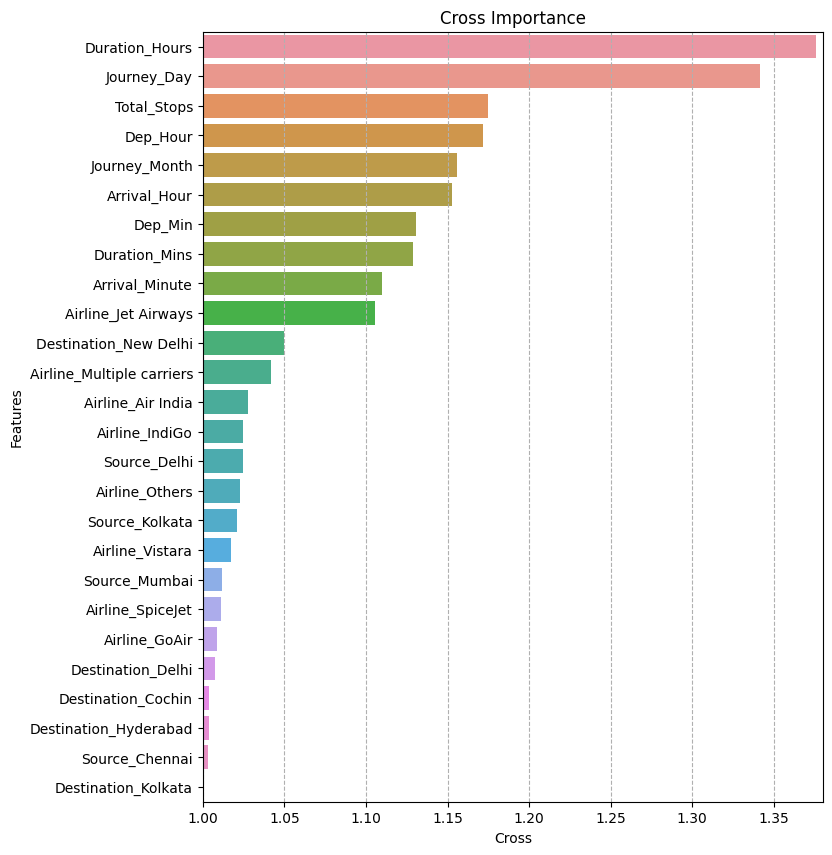

In [208]:
_ = all_importance.sort_values(by='Cross', ascending=False)

fig, ax = plt.subplots(figsize=(8, 10))
sns.barplot(y=_.index, x=_.Cross, ax=ax)
ax.set_xlim(left=1, right=1.38)
ax.grid(axis='x', linestyle='--')
ax.set_title('Cross Importance')
ax.set_ylabel('Features')
plt.show()

Conclusion: Removing the feature whose importance is very low.

In [209]:
drop_columns = [
    'Airline_Vistara', 'Airline_GoAir', 
    'Airline_SpiceJet', 'Source_Mumbai', 'Source_Chennai', 
    'Destination_Hyderabad', 'Destination_Delhi', 'Destination_Cochin', 
    'Destination_Kolkata'
]

### Hyperparameter Optimization

In [210]:
from lightgbm import LGBMRegressor
import optuna
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
   
# X_train, X_test, y_train, y_test = train_test_split(X.drop(columns=drop_columns_lgb), y, test_size=0.1, random_state=14)

def objective_lgb(trial):
    'LightGBM Objective Function'

    # Train Test Split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    
    # GBM Regessor Parameters
    params = {
        'objective' : 'regression',
        'boosting_type' : trial.suggest_categorical('boosting_type', ['gbdt']),
        'max_depth' : trial.suggest_int('max_depth', 1, 10),
        'learning_rate' : trial.suggest_loguniform('learning_rate', 0.01, 0.1),
        'n_estimators' : trial.suggest_int('n_estimators', 100, 1000),
        'min_child_weight' : trial.suggest_int('min_child_weight', 1, 10),
        'subsample' : trial.suggest_float('subsample', 0.3, 0.9),
        'colsample_bytree' : trial.suggest_float('colsample_bytree', 0.3, 0.9),
        'reg_alpha' : trial.suggest_float('reg_alpha', 0.01, 1.0),
        'reg_lambda' : trial.suggest_float('reg_lambda', 0.01, 1.0),
        'random_state' : trial.suggest_categorical('random_state', [42])
    }

    model_lgb = LGBMRegressor(verbosity=-1, **params)
    model_lgb.fit(X_train, y_train)
    y_pred = model_lgb.predict(X_test)
    # Mean Absolute Error
    mae = mean_absolute_error(y_test, y_pred)
    return mae

study_lgb = optuna.create_study(direction='minimize')
study_lgb.optimize(objective_lgb, n_trials=100, show_progress_bar=True)

IPython.display.display('Best Parameters: ', study_lgb.best_params)
lgb = LGBMRegressor(**study_lgb.best_params)

[I 2024-04-08 18:40:14,397] A new study created in memory with name: no-name-d5db1af7-9fd4-4851-99bd-d596f7db96a2


  0%|          | 0/100 [00:00<?, ?it/s]

[I 2024-04-08 18:40:15,162] Trial 0 finished with value: 1179.7314547672388 and parameters: {'boosting_type': 'gbdt', 'max_depth': 10, 'learning_rate': 0.0515180119896205, 'n_estimators': 780, 'min_child_weight': 4, 'subsample': 0.34163271662654127, 'colsample_bytree': 0.41572264893166894, 'reg_alpha': 0.7083159304670424, 'reg_lambda': 0.04194444431763382, 'random_state': 42}. Best is trial 0 with value: 1179.7314547672388.
[I 2024-04-08 18:40:15,284] Trial 1 finished with value: 1957.4851726002248 and parameters: {'boosting_type': 'gbdt', 'max_depth': 1, 'learning_rate': 0.043550898290939236, 'n_estimators': 557, 'min_child_weight': 7, 'subsample': 0.6219030423950478, 'colsample_bytree': 0.6024348151937464, 'reg_alpha': 0.029319693534617282, 'reg_lambda': 0.17795089728878938, 'random_state': 42}. Best is trial 0 with value: 1179.7314547672388.
[I 2024-04-08 18:40:15,639] Trial 2 finished with value: 1323.2851180680645 and parameters: {'boosting_type': 'gbdt', 'max_depth': 5, 'learning

'Best Parameters: '

{'boosting_type': 'gbdt',
 'max_depth': 8,
 'learning_rate': 0.08414924592631814,
 'n_estimators': 786,
 'min_child_weight': 1,
 'subsample': 0.7272896099841774,
 'colsample_bytree': 0.6012370946652914,
 'reg_alpha': 0.6665122291902865,
 'reg_lambda': 0.6180181491983895,
 'random_state': 42}

In [211]:
from sklearn.model_selection import cross_val_score
X_train, X_test, y_train, y_test = train_test_split(X.drop(columns=drop_columns), y, test_size=0.2, random_state=42)
lgb = LGBMRegressor(verbosity=-1, **study_lgb.best_params)
lgb.fit(X_train, y_train)

y_pred = lgb.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred) 

IPython.display.display('-'*50)
IPython.display.display('Mean Squared Error: ', mse)
IPython.display.display('Mean Absolute Error: ', mae)
IPython.display.display('Cross Validation Score Train', cross_val_score(lgb, X_train, y_train))
IPython.display.display('Train Score', lgb.score(X_train, y_train))
IPython.display.display('Cross Validation Score Test', cross_val_score(lgb, X_test, y_test))
IPython.display.display('Test Score', lgb.score(X_test, y_test))
IPython.display.display('-'*50)

'--------------------------------------------------'

'Mean Squared Error: '

3516216.0096012093

'Mean Absolute Error: '

1158.425787792557

'Cross Validation Score Train'

array([0.83686753, 0.80195847, 0.79872231, 0.80692584, 0.81307835])

'Train Score'

0.9291876369596033

'Cross Validation Score Test'

array([0.76195922, 0.75161165, 0.72329101, 0.70629225, 0.73186281])

'Test Score'

0.8314753102367053

'--------------------------------------------------'

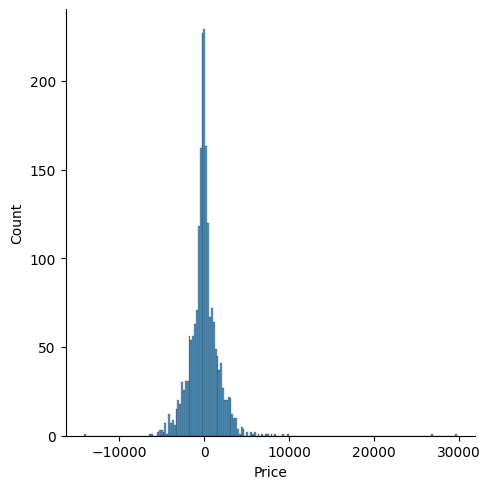

In [212]:
sns.displot(y_test-y_pred)
plt.show()

### Optimizing XGBoost Regressor

In [213]:
from xgboost import XGBRegressor
import optuna
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split


def objective_xgb(trial):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

    params = {
        'objective' : trial.suggest_categorical('objective', ['reg:squarederror']),
        'booster' : trial.suggest_categorical('booster', ['gbtree']),
        'max_depth' : trial.suggest_int('max_depth', 1, 10),
        'learning_rate' : trial.suggest_loguniform('learning_rate', 0.01, 0.1),
        'n_estimators' : trial.suggest_int('n_estimators', 100, 1000),
        'min_child_weight' : trial.suggest_int('min_child_weight', 1, 10),
        'gamma' : trial.suggest_loguniform('gamma', 1e-8, 1),
        'subsample' : trial.suggest_float('subsample', 0.3, 0.9),
        'reg_alpha' : trial.suggest_float('reg_alpha', 0.01, 1.0),
        'reg_lambda' : trial.suggest_float('reg_lambda', 0.01, 1.0),
        'seed' : trial.suggest_categorical('seed', [42])
    }

    model_xgb = XGBRegressor(**params)
    model_xgb.fit(X_train, y_train)
    y_pred = model_xgb.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    return mae


study_xgb = optuna.create_study(direction='minimize')
study_xgb.optimize(objective_xgb, n_trials=100, show_progress_bar=True)


IPython.display.display('-'*50)
IPython.display.display('Best Parameters for XGBoost: ', study_xgb.best_params)


[I 2024-04-08 18:41:17,707] A new study created in memory with name: no-name-9448889f-8fbd-4f06-904d-911ac6f6ce70


  0%|          | 0/100 [00:00<?, ?it/s]

[I 2024-04-08 18:41:18,234] Trial 0 finished with value: 1917.3490110963255 and parameters: {'objective': 'reg:squarederror', 'booster': 'gbtree', 'max_depth': 1, 'learning_rate': 0.023134452045762005, 'n_estimators': 676, 'min_child_weight': 9, 'gamma': 0.31068741175637277, 'subsample': 0.4285382054234739, 'reg_alpha': 0.4169255854861126, 'reg_lambda': 0.5023935450259416, 'seed': 42}. Best is trial 0 with value: 1917.3490110963255.
[I 2024-04-08 18:41:20,418] Trial 1 finished with value: 1208.133273544348 and parameters: {'objective': 'reg:squarederror', 'booster': 'gbtree', 'max_depth': 8, 'learning_rate': 0.04441214147551715, 'n_estimators': 967, 'min_child_weight': 6, 'gamma': 0.001084221107624251, 'subsample': 0.8749220621446134, 'reg_alpha': 0.7050133083793859, 'reg_lambda': 0.6287102748671883, 'seed': 42}. Best is trial 1 with value: 1208.133273544348.
[I 2024-04-08 18:41:21,738] Trial 2 finished with value: 1240.5662119173287 and parameters: {'objective': 'reg:squarederror', 'b

'--------------------------------------------------'

'Best Parameters for XGBoost: '

{'objective': 'reg:squarederror',
 'booster': 'gbtree',
 'max_depth': 9,
 'learning_rate': 0.04394706965692124,
 'n_estimators': 295,
 'min_child_weight': 5,
 'gamma': 5.843347558049871e-08,
 'subsample': 0.6409313445069759,
 'reg_alpha': 0.9111575123229574,
 'reg_lambda': 0.11278716359632594,
 'seed': 42}

In [214]:
X_train, X_test, y_train, y_test = train_test_split(X.drop(columns=drop_columns), y, test_size=0.2, random_state=7)
xgb = XGBRegressor(**study_xgb.best_params)
xgb.fit(X_train, y_train)

y_pred = xgb.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

IPython.display.display('-'*50)
IPython.display.display('Mean Squared Error: ', mse)
IPython.display.display('Mean Absolute Error: ', mae)
IPython.display.display('Cross Validation Score Train', cross_val_score(xgb, X_train, y_train))
IPython.display.display('Train Score', xgb.score(X_train, y_train))
IPython.display.display('Cross Validation Score Test', cross_val_score(xgb, X_test, y_test, cv=4))
IPython.display.display('Test Score', xgb.score(X_test, y_test))
IPython.display.display('-'*50)

'--------------------------------------------------'

'Mean Squared Error: '

4049912.9768453944

'Mean Absolute Error: '

1182.3630199040515

'Cross Validation Score Train'

array([0.81086122, 0.81306381, 0.76903968, 0.79337928, 0.82988993])

'Train Score'

0.9389167429304108

'Cross Validation Score Test'

array([0.68343564, 0.70038491, 0.79132384, 0.71976461])

'Test Score'

0.8294719899284781

'--------------------------------------------------'

### Optimising Extra Tree Regressor

In [215]:
from sklearn.ensemble import ExtraTreesRegressor
import optuna
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split


def objective_extratree(trial):

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

    params = {
        'criterion' : trial.suggest_categorical('criterion', ['squared_error']),
        'max_depth' : trial.suggest_int('max_depth', 2, 10),
        'min_samples_split' : trial.suggest_int('min_samples_split', 2, 15),
        'min_samples_leaf' : trial.suggest_int('min_samples_leaf', 1, 10),
        'n_estimators' : trial.suggest_int('n_estimators', 100, 1000),
        'max_features' : trial.suggest_categorical('max_features', ['sqrt', 'log2']),
        'ccp_alpha' : trial.suggest_int('ccp_alpha', 0, 10)
    }

    model_extratree = ExtraTreesRegressor(**params)
    model_extratree.fit(X_train, y_train)
    y_pred = model_extratree.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    return mae


study_extratree = optuna.create_study(direction='minimize')
study_extratree.optimize(objective_extratree, n_trials=100, show_progress_bar=True)


IPython.display.display('-'*50)
IPython.display.display('Best Parameters for ExtraTree: ', study_extratree.best_params)

[I 2024-04-08 18:43:05,752] A new study created in memory with name: no-name-21b8cd4b-087d-47d0-88c6-ab4c7d0ab63d


  0%|          | 0/100 [00:00<?, ?it/s]

[I 2024-04-08 18:43:07,364] Trial 0 finished with value: 1728.7129898097805 and parameters: {'criterion': 'squared_error', 'max_depth': 9, 'min_samples_split': 11, 'min_samples_leaf': 8, 'n_estimators': 336, 'max_features': 'sqrt', 'ccp_alpha': 3}. Best is trial 0 with value: 1728.7129898097805.
[I 2024-04-08 18:43:09,025] Trial 1 finished with value: 2042.8490648983652 and parameters: {'criterion': 'squared_error', 'max_depth': 6, 'min_samples_split': 13, 'min_samples_leaf': 6, 'n_estimators': 540, 'max_features': 'sqrt', 'ccp_alpha': 4}. Best is trial 0 with value: 1728.7129898097805.
[I 2024-04-08 18:43:11,851] Trial 2 finished with value: 2024.509127816237 and parameters: {'criterion': 'squared_error', 'max_depth': 6, 'min_samples_split': 15, 'min_samples_leaf': 3, 'n_estimators': 995, 'max_features': 'log2', 'ccp_alpha': 8}. Best is trial 0 with value: 1728.7129898097805.
[I 2024-04-08 18:43:13,709] Trial 3 finished with value: 2310.50030543142 and parameters: {'criterion': 'squar

'--------------------------------------------------'

'Best Parameters for ExtraTree: '

{'criterion': 'squared_error',
 'max_depth': 10,
 'min_samples_split': 4,
 'min_samples_leaf': 2,
 'n_estimators': 643,
 'max_features': 'sqrt',
 'ccp_alpha': 3}

In [216]:
X_train, X_test, y_train, y_test = train_test_split(X.drop(columns=drop_columns), y, test_size=0.2, random_state=7)
extra_tree = ExtraTreesRegressor(**study_extratree.best_params)
extra_tree.fit(X_train, y_train)

y_pred = extra_tree.predict(X_test)

mse = mean_squared_error(y_test, y_pred)

IPython.display.display('-'*50)
IPython.display.display('Mean Squared Error: ', mse)
IPython.display.display('Cross Validation Score Train', cross_val_score(extra_tree, X_train, y_train, cv=4))
IPython.display.display('Train Score', extra_tree.score(X_train, y_train))
IPython.display.display('Test Score', extra_tree.score(X_test, y_test))
IPython.display.display('Cross Validation Score Test', cross_val_score(extra_tree, X_test, y_test, cv=4))
IPython.display.display('-'*50)

'--------------------------------------------------'

'Mean Squared Error: '

6133032.129656404

'Cross Validation Score Train'

array([0.73807754, 0.72761343, 0.68827601, 0.75474615])

'Train Score'

0.7933655859882305

'Test Score'

0.7417589536480205

'Cross Validation Score Test'

array([0.63583784, 0.73609348, 0.70970399, 0.66133157])

'--------------------------------------------------'

### Optimising Random Forest

In [217]:
from sklearn.ensemble import RandomForestRegressor
import optuna
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split


def objective_randomforest(trial):

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

    params = {
        'criterion' : trial.suggest_categorical('criterion', ['squared_error']),
        'max_depth' : trial.suggest_int('max_depth', 2, 10),
        'min_samples_split' : trial.suggest_int('min_samples_split', 2, 15),
        'min_samples_leaf' : trial.suggest_int('min_samples_leaf', 1, 10),
        'n_estimators' : trial.suggest_int('n_estimators', 100, 1000),
        'max_features' : trial.suggest_categorical('max_features', ['sqrt', 'log2']),
        'ccp_alpha' : trial.suggest_int('ccp_alpha', 0, 10)
    }

    model_randomforest = RandomForestRegressor(**params)
    model_randomforest.fit(X_train, y_train)
    y_pred = model_randomforest.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    return mae


study_randomforest = optuna.create_study(direction='minimize')
study_randomforest.optimize(objective_randomforest, n_trials=100, show_progress_bar=True)


IPython.display.display('-'*50)
IPython.display.display('Best Parameters for RandomForest: ', study_randomforest.best_params)

[I 2024-04-08 18:49:26,575] A new study created in memory with name: no-name-c27351b4-34e6-4169-9b83-7ce6f1bb8952


  0%|          | 0/100 [00:00<?, ?it/s]

[I 2024-04-08 18:49:28,489] Trial 0 finished with value: 1550.3659755683593 and parameters: {'criterion': 'squared_error', 'max_depth': 10, 'min_samples_split': 3, 'min_samples_leaf': 9, 'n_estimators': 290, 'max_features': 'log2', 'ccp_alpha': 4}. Best is trial 0 with value: 1550.3659755683593.
[I 2024-04-08 18:49:33,808] Trial 1 finished with value: 1602.1787346530123 and parameters: {'criterion': 'squared_error', 'max_depth': 9, 'min_samples_split': 5, 'min_samples_leaf': 7, 'n_estimators': 913, 'max_features': 'sqrt', 'ccp_alpha': 0}. Best is trial 0 with value: 1550.3659755683593.
[I 2024-04-08 18:49:36,241] Trial 2 finished with value: 1547.738869940677 and parameters: {'criterion': 'squared_error', 'max_depth': 9, 'min_samples_split': 6, 'min_samples_leaf': 2, 'n_estimators': 371, 'max_features': 'sqrt', 'ccp_alpha': 3}. Best is trial 2 with value: 1547.738869940677.
[I 2024-04-08 18:49:38,122] Trial 3 finished with value: 2063.2328706664325 and parameters: {'criterion': 'square

'--------------------------------------------------'

'Best Parameters for RandomForest: '

{'criterion': 'squared_error',
 'max_depth': 10,
 'min_samples_split': 12,
 'min_samples_leaf': 1,
 'n_estimators': 486,
 'max_features': 'sqrt',
 'ccp_alpha': 3}

In [218]:
X_train, X_test, y_train, y_test = train_test_split(X.drop(columns=drop_columns), y, test_size=0.2, random_state=7)
random_forest = RandomForestRegressor(**study_randomforest.best_params)
random_forest.fit(X_train, y_train)

y_pred = random_forest.predict(X_test)

mse = mean_squared_error(y_test, y_pred)

IPython.display.display('-'*50)
IPython.display.display('Mean Squared Error: ', mse)
IPython.display.display('Cross Validation Score Train', cross_val_score(random_forest, X_train, y_train, cv=4))
IPython.display.display('Train Score', random_forest.score(X_train, y_train))
IPython.display.display('Test Score', random_forest.score(X_test, y_test))
IPython.display.display('Cross Validation Score Test', cross_val_score(random_forest, X_test, y_test, cv=4))
IPython.display.display('-'*50)

'--------------------------------------------------'

'Mean Squared Error: '

5795492.195100534

'Cross Validation Score Train'

array([0.7706922 , 0.75729904, 0.71288851, 0.79007686])

'Train Score'

0.8224295874304658

'Test Score'

0.755971608015799

'Cross Validation Score Test'

array([0.62661765, 0.74202601, 0.74810791, 0.67160388])

'--------------------------------------------------'

Conclusion: The cross validation score of Random Forest model is nearly same for both train and test data so, I am using Random Forest model for this flight fare prediction.

### Saving the model

In [221]:

random_forest = RandomForestRegressor(**study_randomforest.best_params)
random_forest.fit(X, y)

RandomForestRegressor(ccp_alpha=3, max_depth=10, max_features='sqrt',
                      min_samples_split=12, n_estimators=486)

In [222]:
cross_val_score(random_forest, X, y, cv=5)

array([0.76367187, 0.74983354, 0.7768074 , 0.77378702, 0.74656069])

In [223]:
import os       
import joblib

root_dir = '..'
dir_name = os.path.join(root_dir, 'models')
file_path = os.path.join(dir_name, 'model.joblib')

os.makedirs(dir_name, exist_ok=True)
joblib.dump(random_forest, os.path.join(dir_name, file_path))

['..\\models\\..\\models\\model.joblib']